#Instalacja i import potrzebnych pakietów

In [290]:
import warnings
warnings.filterwarnings('ignore')

In [291]:
!pip install scikit-tda
!pip install Ripser
!pip install persim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [292]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import ripser
import persim
import scipy.cluster.hierarchy as shc

In [293]:
from sklearn import datasets
from ripser import ripser
from persim import plot_diagrams
from ripser import Rips
from sklearn.preprocessing import MinMaxScaler

In [294]:
allteams = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/AllTeams.csv')

In [295]:
pd.set_option('display.max_columns', None)

In [296]:
#dobrany zestaw styatystyk brany pod uwage w tej analizie
zestaw2 = ['Goals','Shots','OnTarShots','Assists','AccPasses','KeyPasses','CleanSheets']

#Analiza dla poszczególnych drużyn

##MCI - Manchester City - 1

In [297]:
mci = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/MCI.csv')
mci

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Joao Cancelo,2,12,36,36,3228,1,81,23,0,56,7,2510,39,34,26,7,0,113,83,19,0
1,2,Rodri,3,12,33,33,2887,7,45,14,0,12,2,2629,29,43,20,5,0,70,72,17,0
2,3,Bernardo Silva,3,12,35,33,2859,8,47,20,0,53,4,1692,59,30,33,6,0,49,57,16,0
3,4,Aymeric Laporte,2,12,33,33,2834,4,35,8,0,6,0,2767,9,14,10,5,1,35,33,18,0
4,5,Ruben Dias,2,12,29,27,2403,2,18,3,0,2,4,2115,15,27,9,5,0,42,26,14,0
5,6,K. De Bruyne,3,12,30,25,2205,15,77,31,0,31,8,1121,87,21,27,2,0,22,32,13,0
6,7,P. Foden,3,12,28,24,2133,9,57,22,0,37,5,839,40,15,23,1,0,19,16,13,0
7,8,R. Sterling,4,12,30,23,2127,13,57,28,2,53,5,700,42,19,37,1,0,21,23,12,0
8,9,J. Grealish,3,12,26,22,1917,3,45,16,0,40,3,819,52,17,55,3,0,25,18,13,0
9,10,Gabriel Jesus,4,12,28,21,1878,8,64,25,1,45,8,627,38,26,26,1,0,27,18,11,0


In [298]:
features_names = mci.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [299]:
scaler = MinMaxScaler()
mci[features_names] = scaler.fit_transform(mci[features_names])
mci

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Joao Cancelo,2,12,1.0000,1.000000,1.000000,0.066667,1.000000,0.724138,0.00,1.000000,0.875,0.879907,0.384615,0.750000,0.369565,1.000000,0.0,1.000000,1.000000,1.000000,0.0
1,2,Rodri,3,12,0.8125,0.857143,0.803685,0.466667,0.506849,0.413793,0.00,0.185185,0.250,0.935514,0.256410,1.000000,0.239130,0.714286,0.0,0.586538,0.847222,0.833333,0.0
2,3,Bernardo Silva,3,12,0.9375,0.857143,0.787565,0.533333,0.534247,0.620690,0.00,0.944444,0.500,0.497664,0.641026,0.638889,0.521739,0.857143,0.0,0.384615,0.638889,0.750000,0.0
3,4,Aymeric Laporte,2,12,0.8125,0.857143,0.773172,0.266667,0.369863,0.206897,0.00,0.074074,0.000,1.000000,0.000000,0.194444,0.021739,0.714286,1.0,0.250000,0.305556,0.916667,0.0
4,5,Ruben Dias,2,12,0.5625,0.571429,0.525043,0.133333,0.136986,0.034483,0.00,0.000000,0.500,0.695327,0.076923,0.555556,0.000000,0.714286,0.0,0.317308,0.208333,0.583333,0.0
5,6,K. De Bruyne,3,12,0.6250,0.476190,0.411054,1.000000,0.945205,1.000000,0.00,0.537037,1.000,0.230841,1.000000,0.388889,0.391304,0.285714,0.0,0.125000,0.291667,0.500000,0.0
6,7,P. Foden,3,12,0.5000,0.428571,0.369603,0.600000,0.671233,0.689655,0.00,0.648148,0.625,0.099065,0.397436,0.222222,0.304348,0.142857,0.0,0.096154,0.069444,0.500000,0.0
7,8,R. Sterling,4,12,0.6250,0.380952,0.366149,0.866667,0.671233,0.896552,0.50,0.944444,0.625,0.034112,0.423077,0.333333,0.608696,0.142857,0.0,0.115385,0.166667,0.416667,0.0
8,9,J. Grealish,3,12,0.3750,0.333333,0.245250,0.200000,0.506849,0.482759,0.00,0.703704,0.375,0.089720,0.551282,0.277778,1.000000,0.428571,0.0,0.153846,0.097222,0.500000,0.0
9,10,Gabriel Jesus,4,12,0.5000,0.285714,0.222798,0.533333,0.767123,0.793103,0.25,0.796296,1.000,0.000000,0.371795,0.527778,0.369565,0.142857,0.0,0.173077,0.097222,0.333333,0.0


In [300]:
arrayPointsMCI = np.array(mci[zestaw2])
#arrayPoints

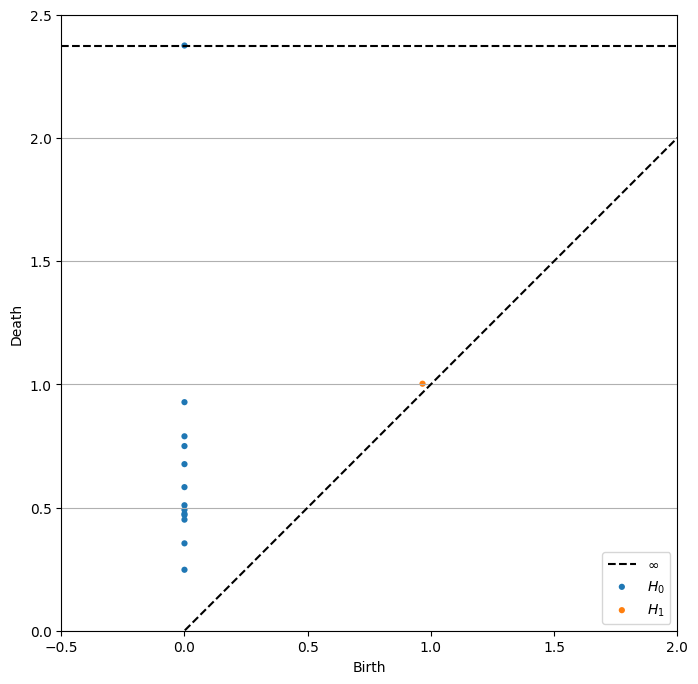

In [422]:
dgMCI = ripser(arrayPointsMCI)['dgms']
plt.grid(axis='y')
plot_diagrams(dgMCI, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]


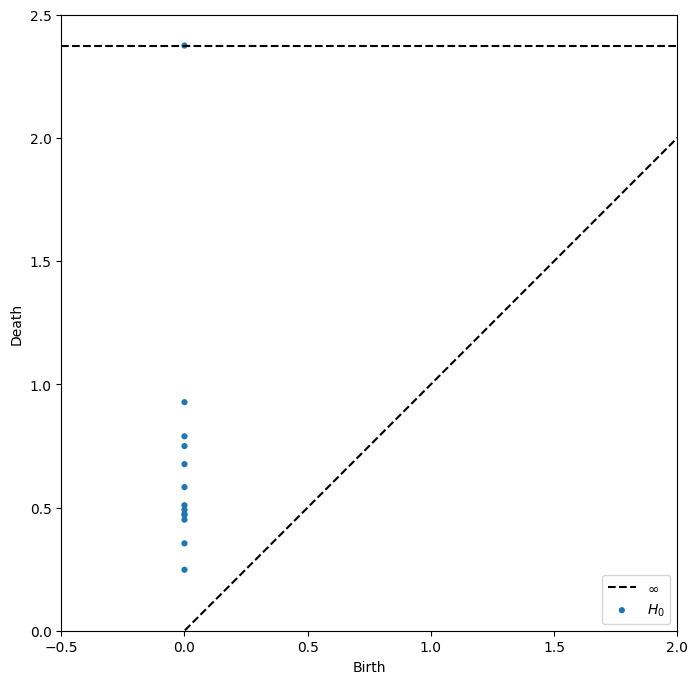

In [302]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgMCI_H0 = ripser(arrayPointsMCI)['dgms'][0]
plot_diagrams(dgMCI_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

## LIV - Liverpool - 2

In [303]:
liv = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/LIV.csv') 
liv

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,V. van Dijk,2,11,34,34,3060,3,35,14,0,6,1,2369,9,9,8,3,0,41,16,21,0
1,2,T. Alexander-Arnold,2,11,32,32,2853,2,51,15,0,19,12,1683,90,12,7,2,0,66,40,18,0
2,3,S. Mane,4,11,34,32,2824,16,98,39,0,47,2,801,41,50,50,5,0,28,33,17,0
3,4,J. Matip,2,11,31,31,2790,3,35,9,0,9,3,2052,12,13,11,2,0,78,47,17,0
4,5,Mohamed Salah,4,11,35,30,2761,23,139,60,5,53,13,862,63,12,23,1,0,14,17,17,0
5,6,J. Henderson,3,11,35,29,2603,2,31,6,0,16,5,1844,38,23,7,3,0,43,36,14,0
6,7,A. Robertson,2,11,29,29,2541,3,18,8,0,13,10,1642,55,19,9,5,1,44,36,17,0
7,8,Diogo Jota,4,11,35,27,2372,15,90,33,0,27,4,557,40,41,40,3,0,24,39,13,0
8,9,Fabinho,3,11,29,26,2316,5,21,10,2,11,1,1349,16,40,28,7,0,65,46,15,0
9,10,Thiago Alcantara,3,11,25,17,1533,1,25,6,0,20,4,1335,29,19,13,2,0,55,48,11,0


In [304]:
features_names = liv.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [305]:
scaler = MinMaxScaler()
liv[features_names] = scaler.fit_transform(liv[features_names])
liv

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,V. van Dijk,2,11,0.958333,1.000000,1.000000,0.130435,0.229630,0.233333,0.0,0.078431,0.076923,1.000000,0.100000,0.046512,0.106383,0.333333,0.0,0.421875,0.00000,1.000000,0.0
1,2,T. Alexander-Arnold,2,11,0.875000,0.916667,0.900241,0.086957,0.348148,0.250000,0.0,0.333333,0.923077,0.654582,1.000000,0.116279,0.085106,0.166667,0.0,0.812500,0.75000,0.823529,0.0
2,3,S. Mane,4,11,0.958333,0.916667,0.886265,0.695652,0.696296,0.650000,0.0,0.882353,0.153846,0.210473,0.455556,1.000000,1.000000,0.666667,0.0,0.218750,0.53125,0.764706,0.0
3,4,J. Matip,2,11,0.833333,0.875000,0.869880,0.130435,0.229630,0.150000,0.0,0.137255,0.230769,0.840383,0.133333,0.139535,0.170213,0.166667,0.0,1.000000,0.96875,0.764706,0.0
4,5,Mohamed Salah,4,11,1.000000,0.833333,0.855904,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.241188,0.700000,0.116279,0.425532,0.000000,0.0,0.000000,0.03125,0.764706,0.0
5,6,J. Henderson,3,11,1.000000,0.791667,0.779759,0.086957,0.200000,0.100000,0.0,0.274510,0.384615,0.735650,0.422222,0.372093,0.085106,0.333333,0.0,0.453125,0.62500,0.588235,0.0
6,7,A. Robertson,2,11,0.750000,0.791667,0.749880,0.130435,0.103704,0.133333,0.0,0.215686,0.769231,0.633938,0.611111,0.279070,0.127660,0.666667,1.0,0.468750,0.62500,0.764706,0.0
7,8,Diogo Jota,4,11,1.000000,0.708333,0.668434,0.652174,0.637037,0.550000,0.0,0.490196,0.307692,0.087613,0.444444,0.790698,0.787234,0.333333,0.0,0.156250,0.71875,0.529412,0.0
8,9,Fabinho,3,11,0.750000,0.666667,0.641446,0.217391,0.125926,0.166667,0.4,0.176471,0.076923,0.486405,0.177778,0.767442,0.531915,1.000000,0.0,0.796875,0.93750,0.647059,0.0
9,10,Thiago Alcantara,3,11,0.583333,0.291667,0.264096,0.043478,0.155556,0.100000,0.0,0.352941,0.307692,0.479355,0.322222,0.279070,0.212766,0.166667,0.0,0.640625,1.00000,0.411765,0.0


In [306]:
arrayPointsLIV = np.array(liv[zestaw2])
#arrayPointsLIV

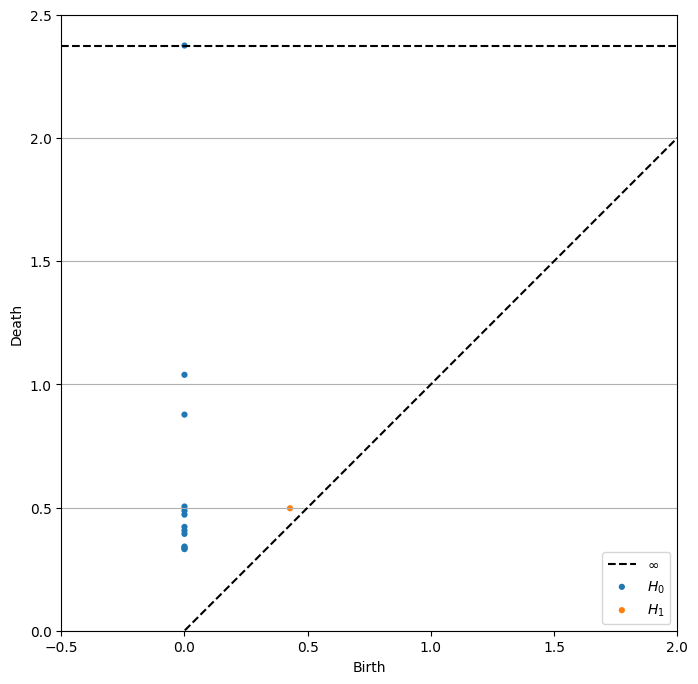

In [307]:
dgLIV = ripser(arrayPointsLIV)['dgms']
plt.grid(axis='y')
plot_diagrams(dgLIV, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

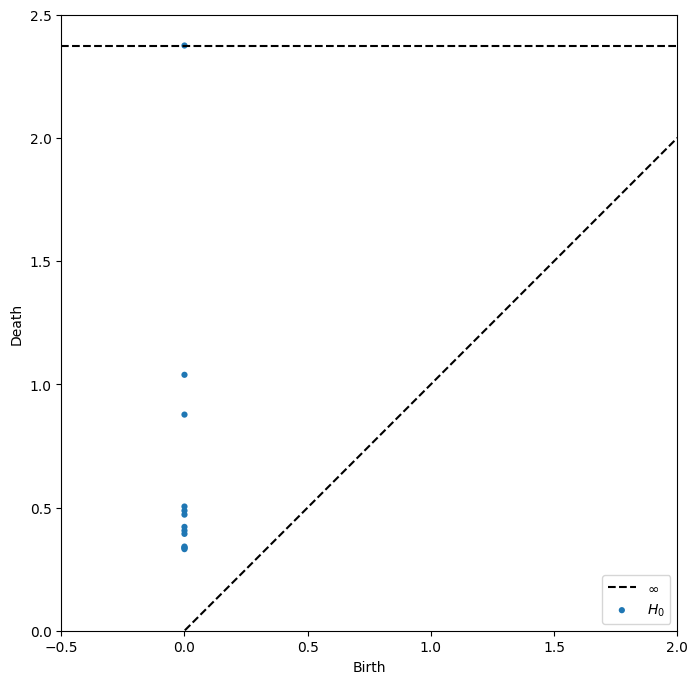

In [308]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgLIV_H0 = ripser(arrayPointsLIV)['dgms'][0]
plot_diagrams(dgLIV_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

##CHE - Chelsea - 3

In [309]:
che = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/CHE.csv') 
che

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,A. Rudiger,2,6,34,34,3035,3,48,13,0,6,0,2199,12,35,12,9,0,56,48,14,0
1,2,Thiago Silva,2,6,32,28,2651,3,18,5,0,6,0,2432,7,12,12,2,0,65,32,11,0
2,3,M. Mount,3,6,32,27,2364,11,76,29,1,18,10,952,58,30,23,4,0,29,41,11,0
3,4,Jorginho,3,6,29,26,2278,6,16,9,6,16,2,1681,27,30,38,5,0,69,64,12,0
4,5,Marcos Alonso,2,6,28,25,2172,4,43,11,0,15,4,920,43,25,28,8,0,72,41,8,0
5,6,Azpilicueta,2,6,27,24,2074,1,11,4,0,15,2,1375,17,25,5,3,0,51,51,7,0
6,7,R. James,2,6,26,22,1865,5,37,10,0,36,9,1235,48,20,31,4,1,42,33,7,0
7,8,K. Havertz,3,6,29,22,1810,8,56,23,0,18,3,532,21,40,25,3,0,12,17,10,0
8,9,N. Kante,3,6,26,21,1778,2,17,9,0,35,4,1120,24,22,11,2,0,62,59,9,0
9,10,R. Lukaku,4,6,26,16,1585,8,43,15,1,13,0,231,24,8,12,1,0,1,2,7,0


In [310]:
features_names = che.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [311]:
scaler = MinMaxScaler()
che[features_names] = scaler.fit_transform(che[features_names])
che

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,A. Rudiger,2,6,1.000000,1.000000,1.000000,0.272727,0.605634,0.448276,0.000000,0.058824,0.0,0.894139,0.148148,0.84375,0.212121,1.000,0.0,0.774648,0.741935,1.000000,0.0
1,2,Thiago Silva,2,6,0.866667,0.666667,0.757881,0.272727,0.183099,0.172414,0.000000,0.058824,0.0,1.000000,0.055556,0.12500,0.212121,0.125,0.0,0.901408,0.483871,0.571429,0.0
2,3,M. Mount,3,6,0.866667,0.611111,0.576923,1.000000,1.000000,1.000000,0.166667,0.411765,1.0,0.327578,1.000000,0.68750,0.545455,0.375,0.0,0.394366,0.629032,0.571429,0.0
3,4,Jorginho,3,6,0.666667,0.555556,0.522699,0.545455,0.154930,0.310345,1.000000,0.352941,0.2,0.658791,0.425926,0.68750,1.000000,0.500,0.0,0.957746,1.000000,0.714286,0.0
4,5,Marcos Alonso,2,6,0.600000,0.500000,0.455864,0.363636,0.535211,0.379310,0.000000,0.323529,0.4,0.313040,0.722222,0.53125,0.696970,0.875,0.0,1.000000,0.629032,0.142857,0.0
5,6,Azpilicueta,2,6,0.533333,0.444444,0.394073,0.090909,0.084507,0.137931,0.000000,0.323529,0.2,0.519764,0.240741,0.53125,0.000000,0.250,0.0,0.704225,0.790323,0.000000,0.0
6,7,R. James,2,6,0.466667,0.333333,0.262295,0.454545,0.450704,0.344828,0.000000,0.941176,0.9,0.456156,0.814815,0.37500,0.787879,0.375,1.0,0.577465,0.500000,0.000000,0.0
7,8,K. Havertz,3,6,0.666667,0.333333,0.227617,0.727273,0.718310,0.793103,0.000000,0.411765,0.3,0.136756,0.314815,1.00000,0.606061,0.250,0.0,0.154930,0.241935,0.428571,0.0
8,9,N. Kante,3,6,0.466667,0.277778,0.207440,0.181818,0.169014,0.310345,0.000000,0.911765,0.4,0.403907,0.370370,0.43750,0.181818,0.125,0.0,0.859155,0.919355,0.285714,0.0
9,10,R. Lukaku,4,6,0.466667,0.000000,0.085750,0.727273,0.535211,0.517241,0.166667,0.264706,0.0,0.000000,0.370370,0.00000,0.212121,0.000,0.0,0.000000,0.000000,0.000000,0.0


In [312]:
arrayPointsCHE = np.array(che[zestaw2])
#arrayPointsCHE

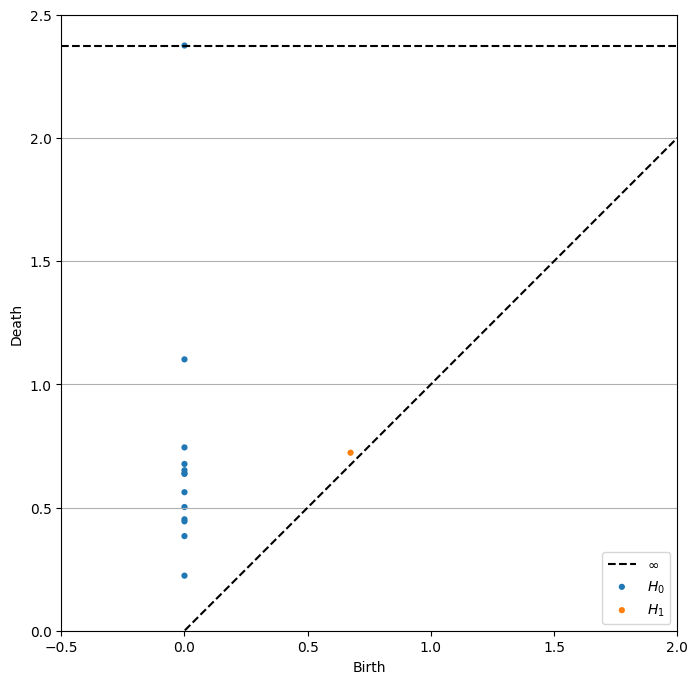

In [313]:
dgCHE = ripser(arrayPointsCHE)['dgms']
plt.grid(axis='y')
plot_diagrams(dgCHE, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

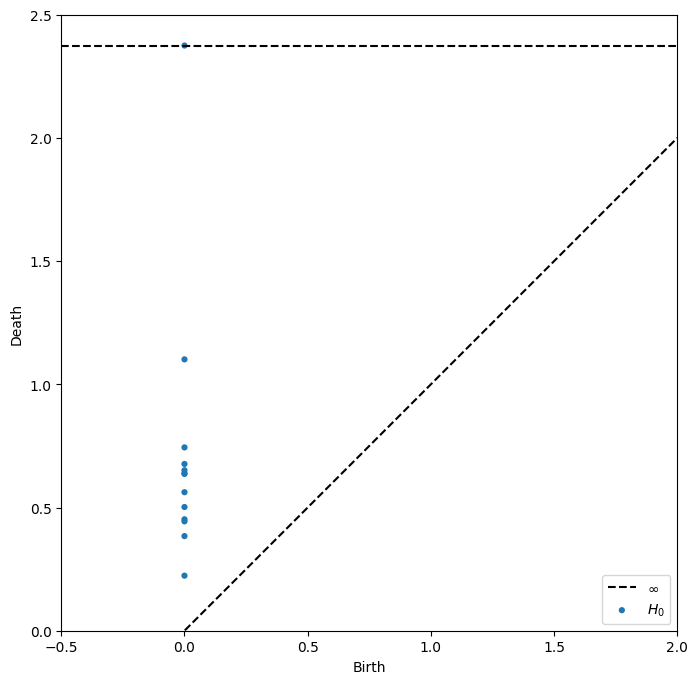

In [314]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgCHE_H0 = ripser(arrayPointsCHE)['dgms'][0]
plot_diagrams(dgCHE_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

##TOT - Tottenham Hotspur - 4

In [315]:
tot = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/TOT.csv') 
tot

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,H. Kane,4,17,37,36,3232,17,133,55,4,54,9,614,50,42,54,5,0,8,15,14,0
1,2,P. Hojbjerg,3,17,36,36,3198,2,31,11,0,42,2,2270,25,28,39,3,0,93,78,16,0
2,3,E. Dier,2,17,35,35,3072,0,13,5,0,1,0,2049,7,12,9,1,0,36,15,16,0
3,4,Son Heung-Min,4,17,35,35,3019,23,86,49,0,51,7,879,72,14,36,2,0,19,15,16,0
4,5,B. Davies,2,17,29,28,2539,1,18,7,0,7,1,1345,11,31,18,6,0,51,36,12,0
5,6,Emerson,2,17,31,26,2289,1,15,4,0,17,1,935,28,28,45,5,0,69,72,9,0
6,7,Reguilon,2,17,25,22,1922,2,21,9,0,19,3,606,29,22,24,4,0,55,40,9,0
7,8,C. Romero,2,17,22,21,1846,1,6,2,0,9,0,1141,6,28,15,8,0,72,62,5,0
8,9,Lucas Moura,4,17,34,19,1772,2,37,12,0,56,6,556,34,20,37,4,0,28,25,8,0
9,10,D. Sanchez,2,17,23,17,1626,2,13,3,0,4,0,989,5,16,11,4,0,52,41,10,0


In [316]:
features_names = tot.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [317]:
scaler = MinMaxScaler()
tot[features_names] = scaler.fit_transform(tot[features_names])
tot

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,H. Kane,4,17,1.00,1.000000,1.000000,0.739130,1.000000,1.000000,1.0,0.963636,1.000000,0.117741,0.671642,1.000000,1.000000,0.571429,0.0,0.000000,0.000000,0.818182,0.0
1,2,P. Hojbjerg,3,17,0.95,1.000000,0.982715,0.086957,0.209302,0.185185,0.0,0.745455,0.222222,1.000000,0.298507,0.533333,0.666667,0.285714,0.0,1.000000,1.000000,1.000000,0.0
2,3,E. Dier,2,17,0.90,0.954545,0.918658,0.000000,0.069767,0.074074,0.0,0.000000,0.000000,0.882259,0.029851,0.000000,0.000000,0.000000,0.0,0.329412,0.000000,1.000000,0.0
3,4,Son Heung-Min,4,17,0.90,0.954545,0.891713,1.000000,0.635659,0.888889,0.0,0.909091,0.777778,0.258924,1.000000,0.066667,0.600000,0.142857,0.0,0.129412,0.000000,1.000000,0.0
4,5,B. Davies,2,17,0.60,0.636364,0.647687,0.043478,0.108527,0.111111,0.0,0.109091,0.111111,0.507192,0.089552,0.633333,0.200000,0.714286,0.0,0.505882,0.333333,0.636364,0.0
5,6,Emerson,2,17,0.70,0.545455,0.520590,0.043478,0.085271,0.055556,0.0,0.290909,0.111111,0.288759,0.343284,0.533333,0.800000,0.571429,0.0,0.717647,0.904762,0.363636,0.0
6,7,Reguilon,2,17,0.40,0.363636,0.334011,0.086957,0.131783,0.148148,0.0,0.327273,0.333333,0.113479,0.358209,0.333333,0.333333,0.428571,0.0,0.552941,0.396825,0.363636,0.0
7,8,C. Romero,2,17,0.25,0.318182,0.295374,0.043478,0.015504,0.018519,0.0,0.145455,0.000000,0.398508,0.014925,0.533333,0.133333,1.000000,0.0,0.752941,0.746032,0.000000,0.0
8,9,Lucas Moura,4,17,0.85,0.227273,0.257753,0.086957,0.255814,0.203704,0.0,1.000000,0.666667,0.086841,0.432836,0.266667,0.622222,0.428571,0.0,0.235294,0.158730,0.272727,0.0
9,10,D. Sanchez,2,17,0.30,0.136364,0.183528,0.086957,0.069767,0.037037,0.0,0.054545,0.000000,0.317528,0.000000,0.133333,0.044444,0.428571,0.0,0.517647,0.412698,0.454545,0.0


In [318]:
arrayPointsTOT = np.array(tot[zestaw2])
#arrayPointsTOT

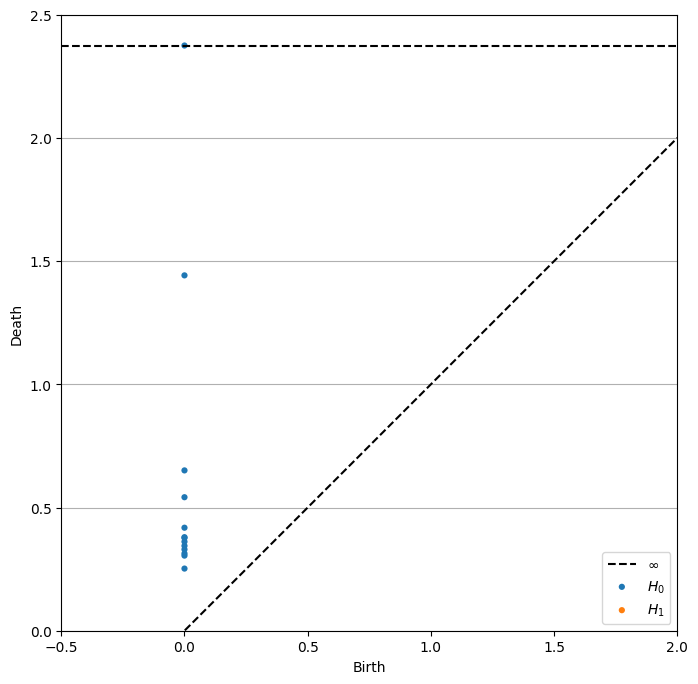

In [319]:
dgTOT = ripser(arrayPointsTOT)['dgms']
plt.grid(axis='y')
plot_diagrams(dgTOT, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

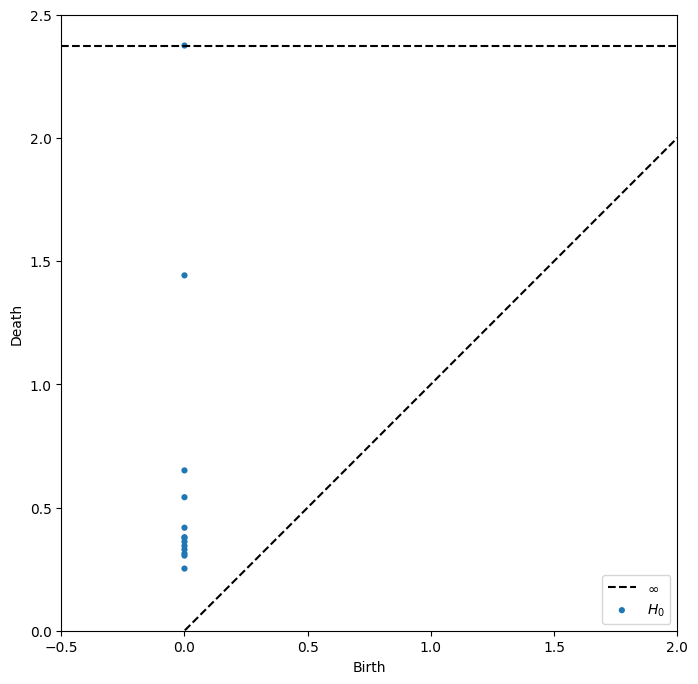

In [320]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgTOT_H0 = ripser(arrayPointsTOT)['dgms'][0]
plot_diagrams(dgTOT_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

##ARS - Arsenal - 5

In [321]:
ars = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/ARS.csv')
ars

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Gabriel Magalhaes,2,1,35,35,3068,5,29,12,0,4,0,1824,10,23,38,6,1,43,50,13,0
1,2,B. Saka,3,1,38,36,2991,11,97,31,2,43,7,845,68,39,59,6,0,43,40,13,0
2,3,B. White,2,1,32,32,2880,0,12,4,0,10,0,1530,13,19,28,3,0,65,44,13,0
3,4,M. Odegaard,3,1,36,32,2791,7,53,21,0,25,4,1338,76,27,20,4,0,32,49,11,0
4,5,G. Xhaka,3,1,27,27,2331,1,27,5,0,19,2,1338,32,29,19,10,1,39,32,6,0
5,6,T. Partey,3,1,24,23,2032,2,44,10,0,35,1,1031,17,33,17,5,0,52,43,10,0
6,7,E. Smith Rowe,3,1,33,21,1920,10,40,23,0,32,2,669,30,5,21,1,0,22,14,7,0
7,8,K. Tierney,2,1,22,22,1918,1,15,5,0,9,3,746,20,5,16,0,0,29,18,10,0
8,9,Gabriel Martinelli,4,1,29,21,1866,6,52,16,1,45,6,418,34,24,20,1,1,39,27,6,0
9,10,A. Lacazette,4,1,30,20,1789,4,46,15,2,19,7,339,29,32,28,0,0,15,27,8,0


In [322]:
features_names = ars.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [323]:
scaler = MinMaxScaler()
ars[features_names] = scaler.fit_transform(ars[features_names])
ars

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Gabriel Magalhaes,2,1,0.823529,0.956522,1.000000,0.454545,0.209302,0.366667,0.0,0.000000,0.000000,1.000000,0.000000,0.529412,0.603774,0.6,1.0,0.56,1.000000,1.0,0.0
1,2,B. Saka,3,1,1.000000,1.000000,0.959431,1.000000,1.000000,1.000000,1.0,0.951220,1.000000,0.340741,0.878788,1.000000,1.000000,0.6,0.0,0.56,0.722222,1.0,0.0
2,3,B. White,2,1,0.647059,0.826087,0.900948,0.000000,0.011628,0.100000,0.0,0.146341,0.000000,0.802020,0.045455,0.411765,0.415094,0.3,0.0,1.00,0.833333,1.0,0.0
3,4,M. Odegaard,3,1,0.882353,0.826087,0.854057,0.636364,0.488372,0.666667,0.0,0.512195,0.571429,0.672727,1.000000,0.647059,0.264151,0.4,0.0,0.34,0.972222,0.8,0.0
4,5,G. Xhaka,3,1,0.352941,0.608696,0.611697,0.090909,0.186047,0.133333,0.0,0.365854,0.285714,0.672727,0.333333,0.705882,0.245283,1.0,1.0,0.48,0.500000,0.3,0.0
5,6,T. Partey,3,1,0.176471,0.434783,0.454162,0.181818,0.383721,0.300000,0.0,0.756098,0.142857,0.465993,0.106061,0.823529,0.207547,0.5,0.0,0.74,0.805556,0.7,0.0
6,7,E. Smith Rowe,3,1,0.705882,0.347826,0.395153,0.909091,0.337209,0.733333,0.0,0.682927,0.285714,0.222222,0.303030,0.000000,0.283019,0.1,0.0,0.14,0.000000,0.4,0.0
7,8,K. Tierney,2,1,0.058824,0.391304,0.394099,0.090909,0.046512,0.133333,0.0,0.121951,0.428571,0.274074,0.151515,0.000000,0.188679,0.0,0.0,0.28,0.111111,0.7,0.0
8,9,Gabriel Martinelli,4,1,0.470588,0.347826,0.366702,0.545455,0.476744,0.500000,0.5,1.000000,0.857143,0.053199,0.363636,0.558824,0.264151,0.1,1.0,0.48,0.361111,0.3,0.0
9,10,A. Lacazette,4,1,0.529412,0.304348,0.326133,0.363636,0.406977,0.466667,1.0,0.365854,1.000000,0.000000,0.287879,0.794118,0.415094,0.0,0.0,0.00,0.361111,0.5,0.0


In [324]:
arrayPointsARS = np.array(ars[zestaw2])
#arrayPointsARS

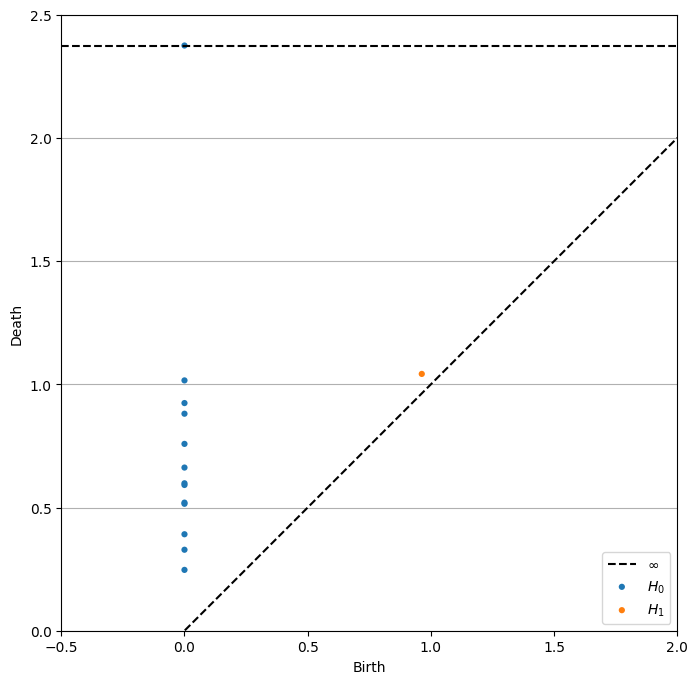

In [325]:
dgARS = ripser(arrayPointsARS)['dgms']
plt.grid(axis='y')
plot_diagrams(dgARS, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

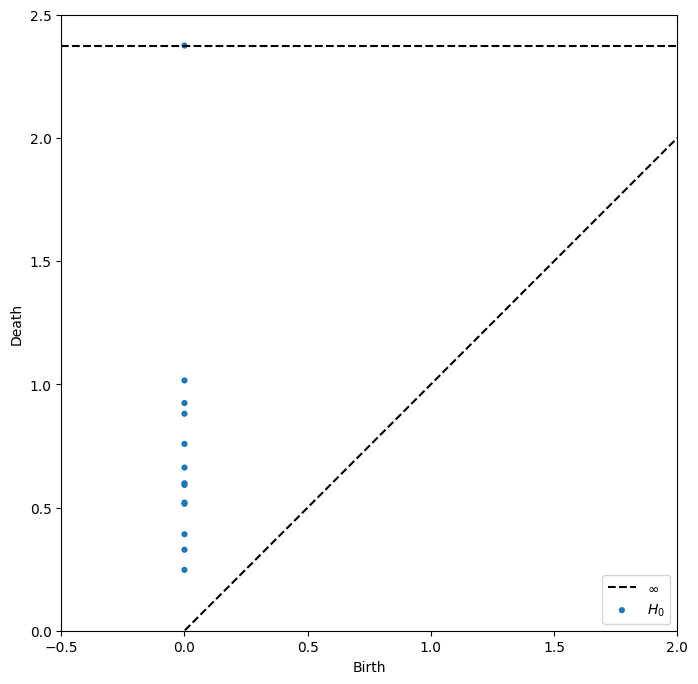

In [326]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgARS_H0 = ripser(arrayPointsARS)['dgms'][0]
plot_diagrams(dgARS_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

##MUN - Manchester United - 6

In [327]:
mun = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/MUN.csv') 
mun

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Bruno Fernandes,3,13,36,35,3118,10,89,29,0,26,6,1488,89,33,47,10,0,45,54,8,0
1,2,H. Maguire,2,13,30,28,2514,1,23,10,0,4,0,1350,4,21,19,7,1,53,34,6,0
2,3,C. Ronaldo,4,13,30,27,2458,18,110,43,3,20,3,720,26,16,18,8,0,8,8,7,0
3,4,S. McTominay,3,13,30,28,2392,1,27,7,0,36,1,1055,23,55,33,9,0,64,65,6,0
4,5,V. Lindelof,2,13,28,26,2355,0,3,2,0,3,2,1209,4,19,6,4,0,36,16,6,0
5,6,Fred,3,13,28,24,2035,4,15,9,0,21,4,1129,28,31,30,5,0,59,63,7,0
6,7,J. Sancho,4,13,29,20,1902,3,26,9,0,47,3,781,41,4,7,0,0,23,14,4,0
7,8,R. Varane,2,13,22,20,1829,1,9,1,0,2,1,1011,4,5,7,0,0,37,28,5,0
8,9,Diogo Dalot,2,13,24,19,1799,0,13,4,0,17,0,771,16,18,4,4,0,70,55,5,0
9,10,A. Wan-Bissaka,2,13,20,20,1794,0,5,1,0,36,0,759,14,15,13,2,0,70,49,3,0


In [328]:
features_names = mun.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [329]:
scaler = MinMaxScaler()
mun[features_names] = scaler.fit_transform(mun[features_names])
mun

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Bruno Fernandes,3,13,1.0000,1.000000,1.000000,0.555556,0.803738,0.666667,0.0,0.533333,1.000000,1.000000,1.000000,0.568627,1.000000,1.0,0.0,0.596774,0.807018,1.000000,0.0
1,2,H. Maguire,2,13,0.6250,0.631579,0.652074,0.055556,0.186916,0.214286,0.0,0.044444,0.000000,0.820312,0.000000,0.333333,0.363636,0.7,1.0,0.725806,0.456140,0.666667,0.0
2,3,C. Ronaldo,4,13,0.6250,0.578947,0.619816,1.000000,1.000000,1.000000,1.0,0.400000,0.500000,0.000000,0.258824,0.235294,0.340909,0.8,0.0,0.000000,0.000000,0.833333,0.0
3,4,S. McTominay,3,13,0.6250,0.631579,0.581797,0.055556,0.224299,0.142857,0.0,0.755556,0.166667,0.436198,0.223529,1.000000,0.681818,0.9,0.0,0.903226,1.000000,0.666667,0.0
4,5,V. Lindelof,2,13,0.5000,0.526316,0.560484,0.000000,0.000000,0.023810,0.0,0.022222,0.333333,0.636719,0.000000,0.294118,0.068182,0.4,0.0,0.451613,0.140351,0.666667,0.0
5,6,Fred,3,13,0.5000,0.421053,0.376152,0.222222,0.112150,0.190476,0.0,0.422222,0.666667,0.532552,0.282353,0.529412,0.613636,0.5,0.0,0.822581,0.964912,0.833333,0.0
6,7,J. Sancho,4,13,0.5625,0.210526,0.299539,0.166667,0.214953,0.190476,0.0,1.000000,0.500000,0.079427,0.435294,0.000000,0.090909,0.0,0.0,0.241935,0.105263,0.333333,0.0
7,8,R. Varane,2,13,0.1250,0.210526,0.257488,0.055556,0.056075,0.000000,0.0,0.000000,0.166667,0.378906,0.000000,0.019608,0.090909,0.0,0.0,0.467742,0.350877,0.500000,0.0
8,9,Diogo Dalot,2,13,0.2500,0.157895,0.240207,0.000000,0.093458,0.071429,0.0,0.333333,0.000000,0.066406,0.141176,0.274510,0.022727,0.4,0.0,1.000000,0.824561,0.500000,0.0
9,10,A. Wan-Bissaka,2,13,0.0000,0.210526,0.237327,0.000000,0.018692,0.000000,0.0,0.755556,0.000000,0.050781,0.117647,0.215686,0.227273,0.2,0.0,1.000000,0.719298,0.166667,0.0


In [330]:
arrayPointsMUN = np.array(mun[zestaw2])
#arrayPointsMUN

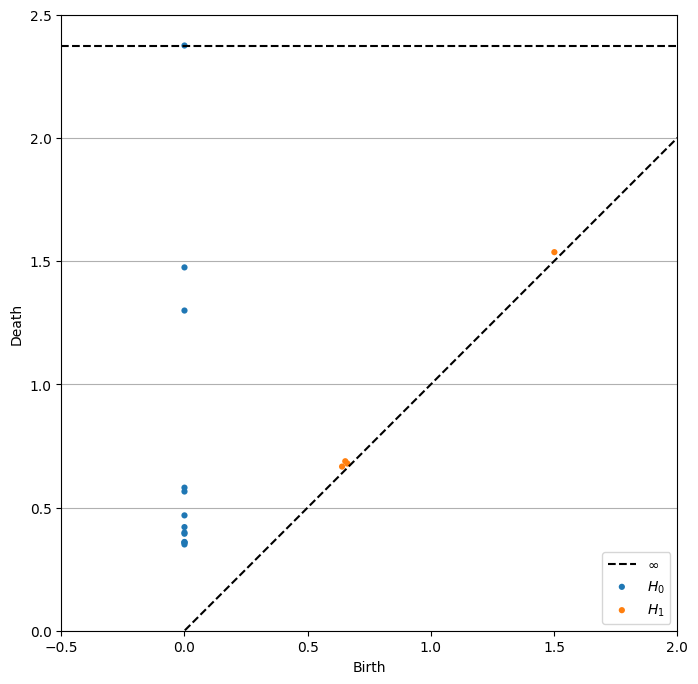

In [331]:
dgMUN = ripser(arrayPointsMUN)['dgms']
plt.grid(axis='y')
plot_diagrams(dgMUN, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

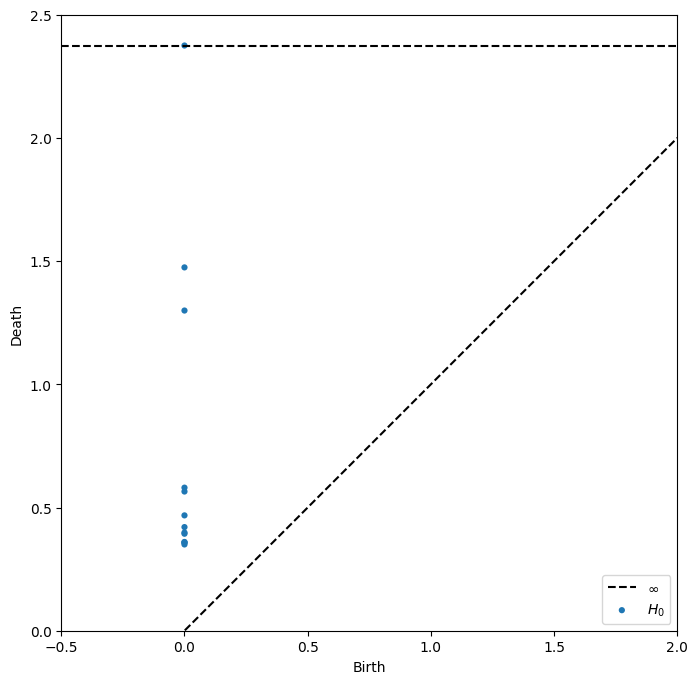

In [332]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgMUN_H0 = ripser(arrayPointsMUN)['dgms'][0]
plot_diagrams(dgMUN_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

##WHU - West Ham United - 7

In [333]:
whu = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/WHU.csv') 
whu

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,D. Rice,3,19,36,35,3178,1,26,8,0,50,4,1973,24,28,10,8,0,105,80,8,0
1,2,T. Soucek,3,19,35,34,3062,5,45,12,0,10,1,1029,21,39,18,3,0,84,66,6,0
2,3,J. Bowen,3,19,36,34,2987,12,79,34,0,50,10,544,41,25,43,6,0,41,36,8,0
3,4,M. Antonio,4,19,36,34,2975,10,83,29,0,50,8,415,45,50,52,6,1,20,23,7,0
4,5,Pablo Fornals,3,19,36,32,2799,6,43,12,0,23,3,1027,48,24,28,4,0,55,54,7,0
5,6,C. Dawson,2,19,34,30,2754,2,25,6,0,4,2,1032,4,39,12,4,1,46,29,6,0
6,7,A. Cresswell,2,19,31,31,2728,2,18,4,0,8,3,1412,31,14,10,3,0,53,28,7,0
7,8,V. Coufal,2,19,28,25,2211,0,11,5,0,15,4,747,21,29,15,3,1,47,45,5,0
8,9,S. Benrahma,4,19,32,26,2184,8,63,22,0,37,6,618,32,9,15,0,0,26,28,6,0
9,10,K. Zouma,2,19,24,24,2080,1,6,3,0,1,0,873,2,11,6,1,0,40,11,5,0


In [334]:
features_names = whu.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [335]:
scaler = MinMaxScaler()
whu[features_names] = scaler.fit_transform(whu[features_names])
whu

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,D. Rice,3,19,1.000000,1.00,1.000000,0.083333,0.296296,0.212121,0.0,1.00,0.4,1.000000,0.489362,0.511111,0.125000,1.000,0.0,1.000000,1.000000,1.000000,0.0
1,2,T. Soucek,3,19,0.956522,0.96,0.947653,0.416667,0.530864,0.333333,0.0,0.20,0.1,0.400635,0.425532,0.755556,0.291667,0.375,0.0,0.766667,0.800000,0.666667,0.0
2,3,J. Bowen,3,19,1.000000,0.96,0.913809,1.000000,0.950617,1.000000,0.0,1.00,1.0,0.092698,0.851064,0.444444,0.812500,0.750,0.0,0.288889,0.371429,1.000000,0.0
3,4,M. Antonio,4,19,1.000000,0.96,0.908394,0.833333,1.000000,0.848485,0.0,1.00,0.8,0.010794,0.936170,1.000000,1.000000,0.750,1.0,0.055556,0.185714,0.833333,0.0
4,5,Pablo Fornals,3,19,1.000000,0.88,0.828971,0.500000,0.506173,0.333333,0.0,0.46,0.3,0.399365,1.000000,0.422222,0.500000,0.500,0.0,0.444444,0.628571,0.833333,0.0
5,6,C. Dawson,2,19,0.913043,0.80,0.808664,0.166667,0.283951,0.151515,0.0,0.08,0.2,0.402540,0.063830,0.755556,0.166667,0.500,1.0,0.344444,0.271429,0.666667,0.0
6,7,A. Cresswell,2,19,0.782609,0.84,0.796931,0.166667,0.197531,0.090909,0.0,0.16,0.3,0.643810,0.638298,0.200000,0.125000,0.375,0.0,0.422222,0.257143,0.833333,0.0
7,8,V. Coufal,2,19,0.652174,0.60,0.563628,0.000000,0.111111,0.121212,0.0,0.30,0.4,0.221587,0.425532,0.533333,0.229167,0.375,1.0,0.355556,0.500000,0.500000,0.0
8,9,S. Benrahma,4,19,0.826087,0.64,0.551444,0.666667,0.753086,0.636364,0.0,0.74,0.6,0.139683,0.659574,0.088889,0.229167,0.000,0.0,0.122222,0.257143,0.666667,0.0
9,10,K. Zouma,2,19,0.478261,0.56,0.504513,0.083333,0.049383,0.060606,0.0,0.02,0.0,0.301587,0.021277,0.133333,0.041667,0.125,0.0,0.277778,0.014286,0.500000,0.0


In [336]:
arrayPointsWHU = np.array(whu[zestaw2])
#arrayPoints

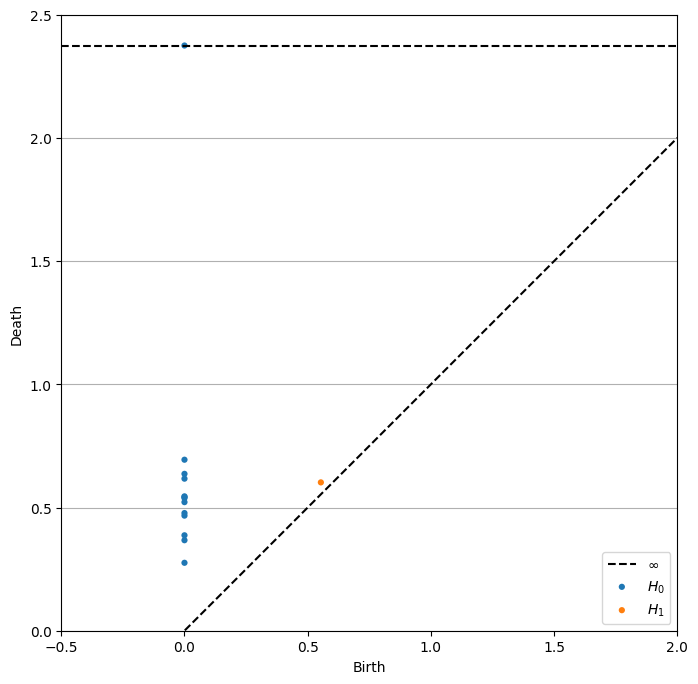

In [337]:
dgWHU = ripser(arrayPointsWHU)['dgms']
plt.grid(axis='y')
plot_diagrams(dgWHU, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

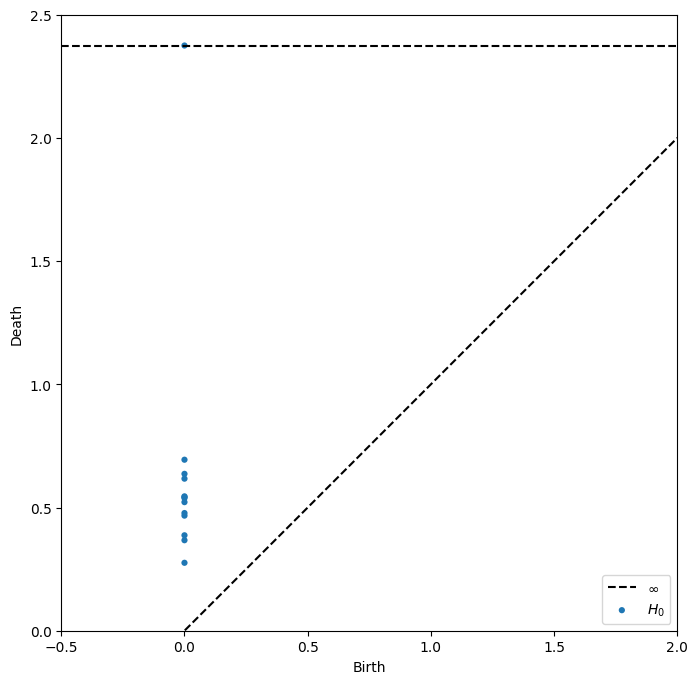

In [338]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgWHU_H0 = ripser(arrayPointsWHU)['dgms'][0]
plot_diagrams(dgWHU_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

##LEI - Leicester City - 8

In [339]:
lei = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/LEI.csv') 
lei

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Y. Tielemans,3,10,32,29,2633,6,59,17,2,25,4,1425,37,32,36,3,0,60,74,6,0
1,2,C. Soyuncu,2,10,28,28,2498,1,8,1,0,4,0,1625,3,24,14,5,0,62,47,5,0
2,3,J. Maddison,3,10,35,28,2466,12,72,34,0,31,8,770,48,22,64,3,0,31,40,5,0
3,4,T. Castagne,2,10,27,22,2126,1,7,3,0,6,0,903,15,15,7,1,0,60,67,4,0
4,5,D. Amartey,3,10,28,23,2119,0,2,1,0,6,0,1393,4,14,8,4,0,34,26,5,0
5,6,H. Barnes,3,10,32,24,2105,6,66,24,0,31,10,538,29,19,20,2,0,21,31,5,0
6,7,K. Dewsbury-Hall,3,10,28,23,2105,1,21,3,0,30,2,932,35,20,29,4,0,45,39,6,0
7,8,L. Thomas,2,10,22,21,1912,0,4,0,0,15,1,820,12,15,16,2,0,71,50,5,0
8,9,J. Vardy,4,10,25,20,1805,15,54,26,0,9,2,182,18,13,12,2,0,6,6,4,0
9,10,W. Ndidi,3,10,19,18,1619,0,14,4,0,11,0,747,2,30,22,4,0,74,60,5,0


In [340]:
features_names = lei.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [341]:
scaler = MinMaxScaler()
lei[features_names] = scaler.fit_transform(lei[features_names])
lei

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Y. Tielemans,3,10,0.823529,1.0000,1.000000,0.400000,0.814286,0.500000,1.0,0.638889,0.4,0.861400,0.760870,1.000000,0.508772,0.50,0.0,0.794118,1.000000,1.000000,0.0
1,2,C. Soyuncu,2,10,0.588235,0.9375,0.901747,0.066667,0.085714,0.029412,0.0,0.055556,0.0,1.000000,0.021739,0.578947,0.122807,1.00,0.0,0.823529,0.602941,0.833333,0.0
2,3,J. Maddison,3,10,1.000000,0.9375,0.878457,0.800000,1.000000,1.000000,0.0,0.805556,0.8,0.407484,1.000000,0.473684,1.000000,0.50,0.0,0.367647,0.500000,0.833333,0.0
3,4,T. Castagne,2,10,0.529412,0.5625,0.631004,0.066667,0.071429,0.088235,0.0,0.111111,0.0,0.499653,0.282609,0.105263,0.000000,0.00,0.0,0.794118,0.897059,0.666667,0.0
4,5,D. Amartey,3,10,0.588235,0.6250,0.625910,0.000000,0.000000,0.029412,0.0,0.111111,0.0,0.839224,0.043478,0.052632,0.017544,0.75,0.0,0.411765,0.294118,0.833333,0.0
5,6,H. Barnes,3,10,0.823529,0.6875,0.615721,0.400000,0.914286,0.705882,0.0,0.805556,1.0,0.246708,0.586957,0.315789,0.228070,0.25,0.0,0.220588,0.367647,0.833333,0.0
6,7,K. Dewsbury-Hall,3,10,0.588235,0.6250,0.615721,0.066667,0.271429,0.088235,0.0,0.777778,0.2,0.519751,0.717391,0.368421,0.385965,0.75,0.0,0.573529,0.485294,1.000000,0.0
7,8,L. Thomas,2,10,0.235294,0.5000,0.475255,0.000000,0.028571,0.000000,0.0,0.361111,0.1,0.442134,0.217391,0.105263,0.157895,0.25,0.0,0.955882,0.647059,0.833333,0.0
8,9,J. Vardy,4,10,0.411765,0.4375,0.397380,1.000000,0.742857,0.764706,0.0,0.194444,0.2,0.000000,0.347826,0.000000,0.087719,0.25,0.0,0.000000,0.000000,0.666667,0.0
9,10,W. Ndidi,3,10,0.058824,0.3125,0.262009,0.000000,0.171429,0.117647,0.0,0.250000,0.0,0.391545,0.000000,0.894737,0.263158,0.75,0.0,1.000000,0.794118,0.833333,0.0


In [342]:
arrayPointsLEI = np.array(lei[zestaw2])
#arrayPoints

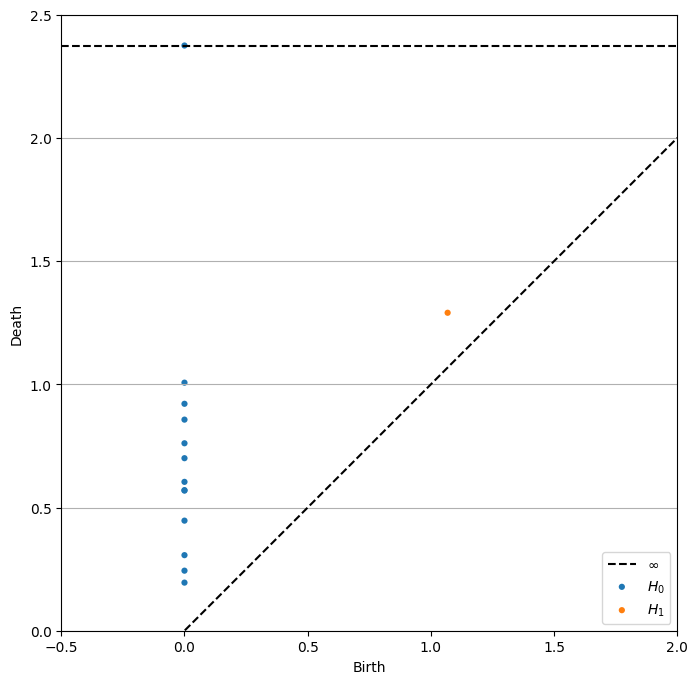

In [343]:
dgLEI = ripser(arrayPointsLEI)['dgms']
plt.grid(axis='y')
plot_diagrams(dgLEI, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

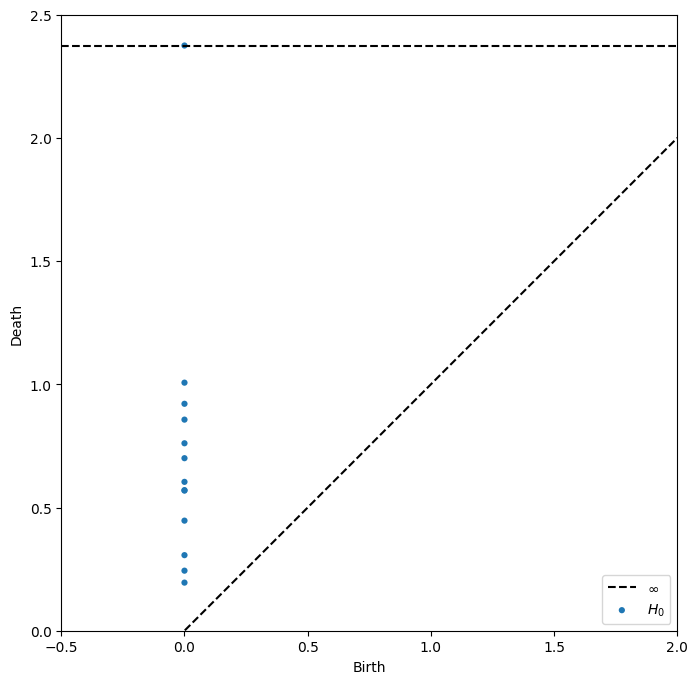

In [344]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgLEI_H0 = ripser(arrayPointsLEI)['dgms'][0]
plot_diagrams(dgLEI_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

##BHA -	Brighton & Hove Albion - 9

In [345]:
bha = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/BHA.csv') 
bha

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Cucurella,3,4,35,35,3092,1,18,3,0,28,1,1557,42,28,30,6,0,92,93,10,0
1,2,J. Veltman,2,4,34,33,2881,1,12,3,0,16,1,1263,17,39,38,6,0,93,74,8,0
2,3,L. Trossard,3,4,34,32,2810,8,74,27,1,56,3,874,47,24,26,2,0,35,34,9,0
3,4,L. Dunk,2,4,29,29,2574,1,19,7,0,4,0,1719,3,9,4,3,1,35,10,10,0
4,5,N. Maupay,4,4,32,25,2275,8,61,15,1,21,2,469,23,33,31,7,0,12,17,7,0
5,6,Y. Bissouma,3,4,26,25,2116,1,21,5,0,34,2,1059,8,30,19,10,0,99,76,6,0
6,7,A. Mac Allister,3,4,33,22,2116,5,60,11,2,21,2,840,31,30,39,4,0,53,65,6,0
7,8,P. Gross,3,4,29,24,2043,2,24,9,0,9,4,920,60,15,6,1,0,33,28,8,0
8,9,S. March,3,4,31,17,1739,0,20,10,0,23,2,494,35,31,20,1,0,34,30,4,0
9,10,J. Moder,3,4,28,19,1702,0,28,6,0,12,3,567,16,19,11,1,0,35,42,5,0


In [346]:
features_names = bha.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [347]:
scaler = MinMaxScaler()
bha[features_names] = scaler.fit_transform(bha[features_names])
bha

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,Cucurella,3,4,1.000000,1.00,1.000000,0.125,0.096774,0.000000,0.0,0.461538,0.25,0.892502,0.684211,0.633333,0.565217,0.6,0.0,0.919540,1.000000,1.000000,0.0
1,2,J. Veltman,2,4,0.909091,0.90,0.869350,0.125,0.000000,0.000000,0.0,0.230769,0.25,0.697412,0.245614,1.000000,0.739130,0.6,0.0,0.931034,0.771084,0.666667,0.0
2,3,L. Trossard,3,4,0.909091,0.85,0.825387,1.000,1.000000,1.000000,0.5,1.000000,0.75,0.439283,0.771930,0.500000,0.478261,0.2,0.0,0.264368,0.289157,0.833333,0.0
3,4,L. Dunk,2,4,0.454545,0.70,0.679257,0.125,0.112903,0.166667,0.0,0.000000,0.00,1.000000,0.000000,0.000000,0.000000,0.3,1.0,0.264368,0.000000,1.000000,0.0
4,5,N. Maupay,4,4,0.727273,0.50,0.494118,1.000,0.790323,0.500000,0.5,0.326923,0.50,0.170537,0.350877,0.800000,0.586957,0.7,0.0,0.000000,0.084337,0.500000,0.0
5,6,Y. Bissouma,3,4,0.181818,0.50,0.395666,0.125,0.145161,0.083333,0.0,0.576923,0.50,0.562044,0.087719,0.700000,0.326087,1.0,0.0,1.000000,0.795181,0.333333,0.0
6,7,A. Mac Allister,3,4,0.818182,0.35,0.395666,0.625,0.774194,0.333333,1.0,0.326923,0.50,0.416722,0.491228,0.700000,0.760870,0.4,0.0,0.471264,0.662651,0.333333,0.0
7,8,P. Gross,3,4,0.454545,0.45,0.350464,0.250,0.193548,0.250000,0.0,0.096154,1.00,0.469808,1.000000,0.200000,0.043478,0.1,0.0,0.241379,0.216867,0.666667,0.0
8,9,S. March,3,4,0.636364,0.10,0.162229,0.000,0.129032,0.291667,0.0,0.365385,0.50,0.187127,0.561404,0.733333,0.347826,0.1,0.0,0.252874,0.240964,0.000000,0.0
9,10,J. Moder,3,4,0.363636,0.20,0.139319,0.000,0.258065,0.125000,0.0,0.153846,0.75,0.235567,0.228070,0.333333,0.152174,0.1,0.0,0.264368,0.385542,0.166667,0.0


In [348]:
arrayPointsBHA = np.array(bha[zestaw2])
#arrayPoints

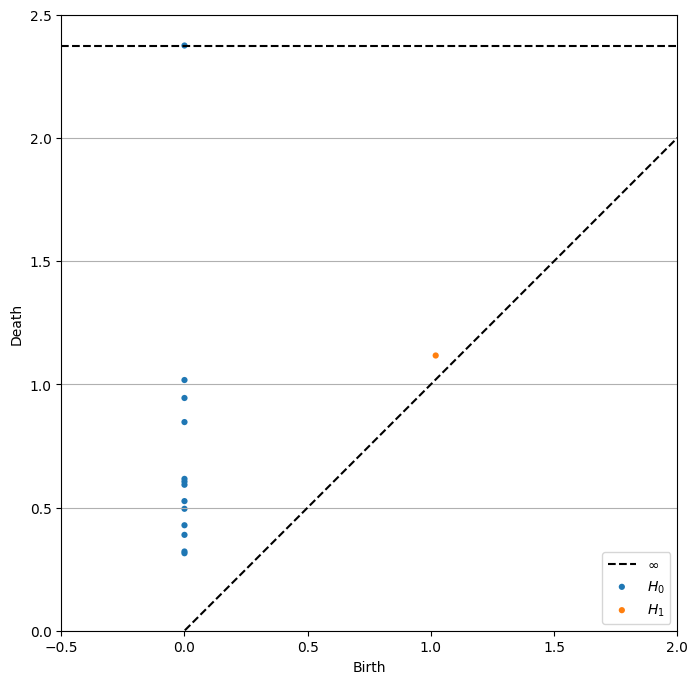

In [349]:
dgBHA = ripser(arrayPointsBHA)['dgms']
plt.grid(axis='y')
plot_diagrams(dgBHA, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

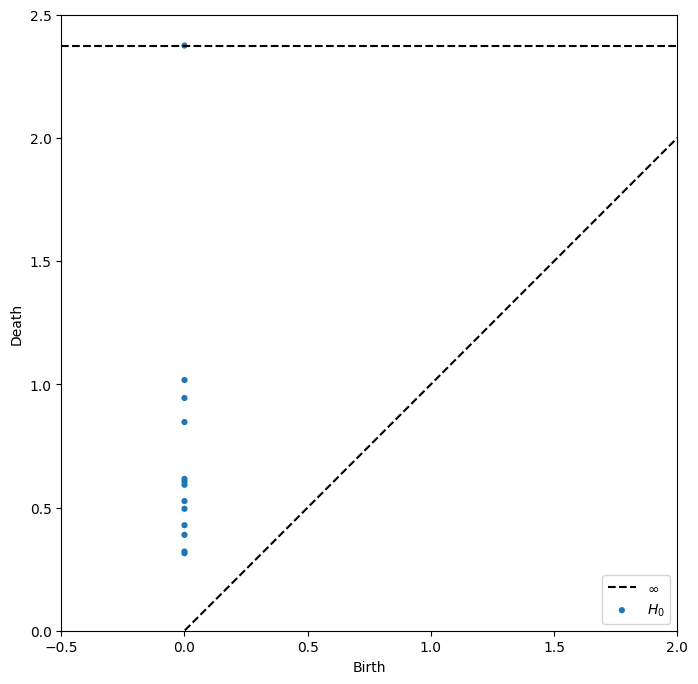

In [350]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgBHA_H0 = ripser(arrayPointsBHA)['dgms'][0]
plot_diagrams(dgBHA_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

##WOL - Wolverhampton Wanderers - 10

In [351]:
wol = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/WOL.csv') 
wol

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,C. Coady,2,20,38,38,3363,4,12,4,0,1,0,1514,3,20,1,5,0,42,31,11,0
1,2,Joao Moutinho,3,20,35,34,2975,2,20,7,0,16,1,1665,39,36,15,4,0,73,74,10,0
2,3,R. Saiss,2,20,31,31,2708,2,18,6,0,7,0,1426,7,30,15,6,0,85,40,11,0
3,4,M. Kilman,2,20,30,30,2688,1,13,4,0,17,0,1306,3,17,11,3,0,71,50,10,0
4,5,Ruben Neves,3,20,33,31,2662,4,42,16,0,26,2,1621,25,25,12,9,0,78,68,9,0
5,6,R. Jimenez,4,20,34,30,2637,6,57,16,1,36,4,538,38,43,48,5,2,27,29,10,0
6,7,Nelson Semedo,2,20,25,25,2137,0,19,4,0,39,1,706,18,23,24,1,0,60,58,8,0
7,8,L. Dendoncker,3,20,30,21,1946,2,23,10,0,5,2,706,11,13,6,4,0,26,42,5,0
8,9,R. Ait Nouri,2,20,23,20,1827,1,13,4,0,42,2,578,17,14,20,4,0,58,64,5,0
9,10,Hwang Hee-Chan,4,20,30,20,1819,5,27,12,0,33,1,507,16,29,42,2,0,26,27,5,0


In [352]:
features_names = wol.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [353]:
scaler = MinMaxScaler()
wol[features_names] = scaler.fit_transform(wol[features_names])
wol

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,C. Coady,2,20,1.00,1.000000,1.000000,0.666667,0.021739,0.200000,0.0,0.000000,0.00,0.885606,0.000000,0.342857,0.000000,0.555556,0.0,0.328125,0.232143,1.000000,0.0
1,2,Joao Moutinho,3,20,0.85,0.826087,0.808300,0.333333,0.195652,0.400000,0.0,0.348837,0.25,1.000000,1.000000,0.800000,0.297872,0.444444,0.0,0.812500,1.000000,0.857143,0.0
2,3,R. Saiss,2,20,0.65,0.695652,0.676383,0.333333,0.152174,0.333333,0.0,0.139535,0.00,0.818939,0.111111,0.628571,0.297872,0.666667,0.0,1.000000,0.392857,1.000000,0.0
3,4,M. Kilman,2,20,0.60,0.652174,0.666502,0.166667,0.043478,0.200000,0.0,0.372093,0.00,0.728030,0.000000,0.257143,0.212766,0.333333,0.0,0.781250,0.571429,0.857143,0.0
4,5,Ruben Neves,3,20,0.75,0.695652,0.653656,0.666667,0.673913,1.000000,0.0,0.581395,0.50,0.966667,0.611111,0.485714,0.234043,1.000000,0.0,0.890625,0.892857,0.714286,0.0
5,6,R. Jimenez,4,20,0.80,0.652174,0.641304,1.000000,1.000000,1.000000,1.0,0.813953,1.00,0.146212,0.972222,1.000000,1.000000,0.555556,1.0,0.093750,0.196429,0.857143,0.0
6,7,Nelson Semedo,2,20,0.35,0.434783,0.394269,0.000000,0.173913,0.200000,0.0,0.883721,0.25,0.273485,0.416667,0.428571,0.489362,0.111111,0.0,0.609375,0.714286,0.571429,0.0
7,8,L. Dendoncker,3,20,0.60,0.260870,0.299901,0.333333,0.260870,0.600000,0.0,0.093023,0.50,0.273485,0.222222,0.142857,0.106383,0.444444,0.0,0.078125,0.428571,0.142857,0.0
8,9,R. Ait Nouri,2,20,0.25,0.217391,0.241107,0.166667,0.043478,0.200000,0.0,0.953488,0.50,0.176515,0.388889,0.171429,0.404255,0.444444,0.0,0.578125,0.821429,0.142857,0.0
9,10,Hwang Hee-Chan,4,20,0.60,0.217391,0.237154,0.833333,0.347826,0.733333,0.0,0.744186,0.25,0.122727,0.361111,0.600000,0.872340,0.222222,0.0,0.078125,0.160714,0.142857,0.0


In [354]:
arrayPointsWOL = np.array(wol[zestaw2])
#arrayPoints

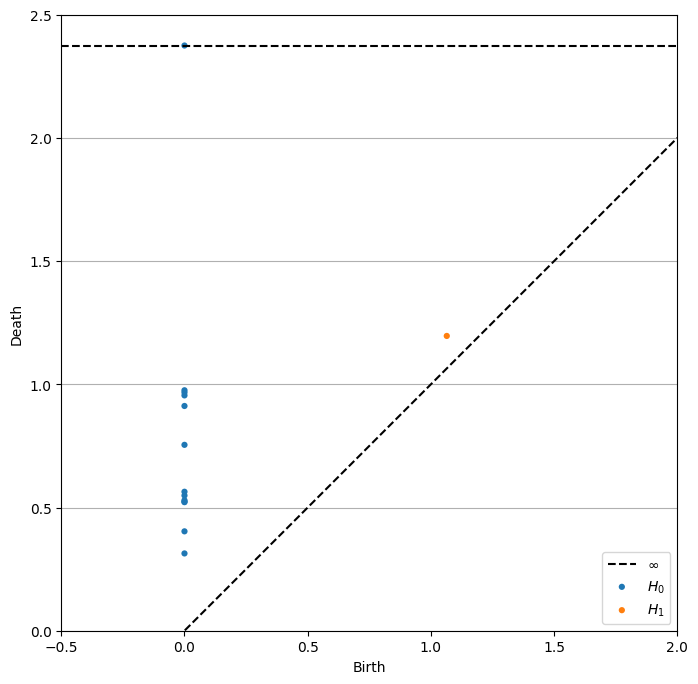

In [355]:
dgWOL = ripser(arrayPointsWOL)['dgms']
plt.grid(axis='y')
plot_diagrams(dgWOL, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

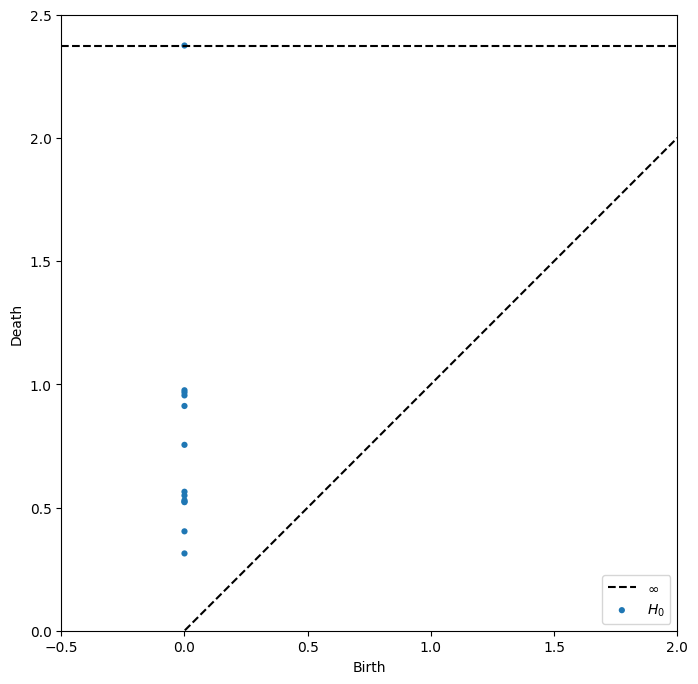

In [356]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgWOL_H0 = ripser(arrayPointsWOL)['dgms'][0]
plot_diagrams(dgWOL_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

## NEW - Newcastle United - 11

In [357]:
new = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/NEW.csv') 
new

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Targett,2,14,33,33,2873,1,13,6,0,10,1,884,40,24,23,3,0,91,75,9,0
1,2,A. Saint-Maximin,3,14,35,31,2809,5,64,26,0,150,5,515,50,22,48,6,0,19,13,7,0
2,3,C. Wood,4,14,34,32,2705,5,51,19,1,6,0,346,19,33,17,1,0,7,9,7,0
3,4,Joelinton,4,14,35,30,2558,4,45,14,0,37,1,707,29,64,33,8,0,72,72,7,0
4,5,D. Burn,2,14,29,28,2462,1,18,5,0,0,1,977,6,26,6,8,0,66,37,9,0
5,6,F. Schar,2,14,25,25,2161,2,21,8,0,6,2,686,9,24,11,4,0,43,16,6,0
6,7,J. Lascelles,2,14,26,22,2055,1,17,4,0,1,0,515,4,17,4,5,0,29,15,3,0
7,8,J. Willock,3,14,29,24,2042,2,35,11,0,36,0,444,18,34,26,0,0,58,64,5,0
8,9,J. Shelvey,3,14,24,22,1985,2,30,14,0,9,1,731,16,18,8,5,1,39,30,6,0
9,10,M. Almiron,3,14,30,19,1720,1,32,7,0,27,0,397,17,17,25,2,0,49,47,4,0


In [358]:
features_names = new.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [359]:
scaler = MinMaxScaler()
new[features_names] = scaler.fit_transform(new[features_names])
new

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Targett,2,14,0.866667,1.000000,1.000000,0.2,0.120690,0.166667,0.0,0.066667,0.2,0.862832,0.782609,0.259259,0.431818,0.375,0.0,1.000000,1.000000,1.000000,0.0
1,2,A. Saint-Maximin,3,14,1.000000,0.888889,0.954674,1.0,1.000000,1.000000,0.0,1.000000,1.0,0.318584,1.000000,0.222222,1.000000,0.750,0.0,0.142857,0.074627,0.714286,0.0
2,3,C. Wood,4,14,0.933333,0.944444,0.881020,1.0,0.775862,0.708333,1.0,0.040000,0.0,0.069322,0.326087,0.425926,0.295455,0.125,0.0,0.000000,0.014925,0.714286,0.0
3,4,Joelinton,4,14,1.000000,0.833333,0.776912,0.8,0.672414,0.500000,0.0,0.246667,0.2,0.601770,0.543478,1.000000,0.659091,1.000,0.0,0.773810,0.955224,0.714286,0.0
4,5,D. Burn,2,14,0.600000,0.722222,0.708924,0.2,0.206897,0.125000,0.0,0.000000,0.2,1.000000,0.043478,0.296296,0.045455,1.000,0.0,0.702381,0.432836,1.000000,0.0
5,6,F. Schar,2,14,0.333333,0.555556,0.495751,0.4,0.258621,0.250000,0.0,0.040000,0.4,0.570796,0.108696,0.259259,0.159091,0.500,0.0,0.428571,0.119403,0.571429,0.0
6,7,J. Lascelles,2,14,0.400000,0.388889,0.420680,0.2,0.189655,0.083333,0.0,0.006667,0.0,0.318584,0.000000,0.129630,0.000000,0.625,0.0,0.261905,0.104478,0.142857,0.0
7,8,J. Willock,3,14,0.600000,0.500000,0.411473,0.4,0.500000,0.375000,0.0,0.240000,0.0,0.213864,0.304348,0.444444,0.500000,0.000,0.0,0.607143,0.835821,0.428571,0.0
8,9,J. Shelvey,3,14,0.266667,0.388889,0.371105,0.4,0.413793,0.500000,0.0,0.060000,0.2,0.637168,0.260870,0.148148,0.090909,0.625,1.0,0.380952,0.328358,0.571429,0.0
9,10,M. Almiron,3,14,0.666667,0.222222,0.183428,0.2,0.448276,0.208333,0.0,0.180000,0.0,0.144543,0.282609,0.129630,0.477273,0.250,0.0,0.500000,0.582090,0.285714,0.0


In [360]:
arrayPointsNEW = np.array(new[zestaw2])
#arrayPoints

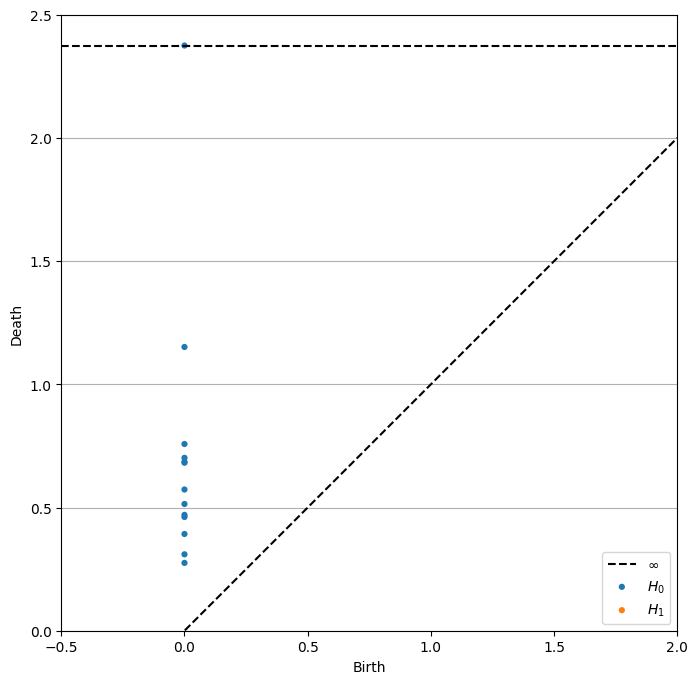

In [361]:
dgNEW = ripser(arrayPointsNEW)['dgms']
plt.grid(axis='y')
plot_diagrams(dgNEW, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

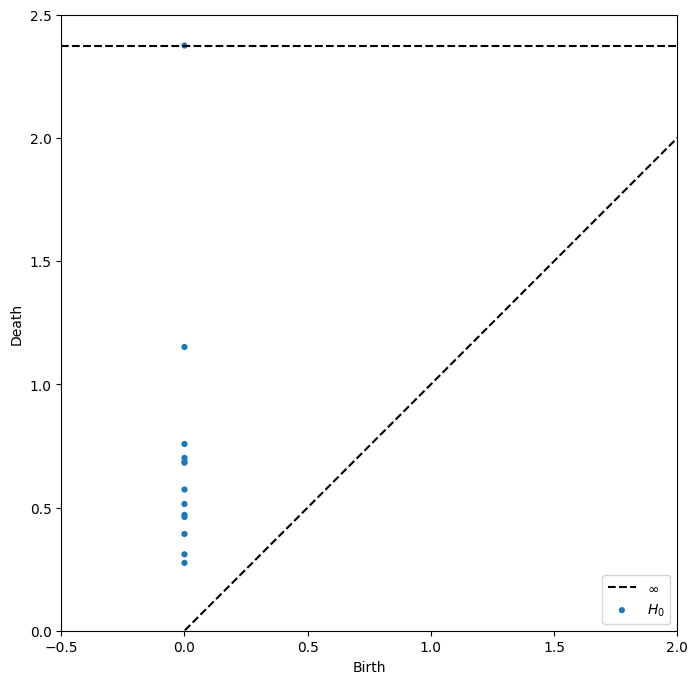

In [362]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgNEW_H0 = ripser(arrayPointsNEW)['dgms'][0]
plot_diagrams(dgNEW_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

## CRY -	Crystal Palace	- 12

In [363]:
cry = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/CRY.csv')
cry

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Guehi,2,7,36,36,3223,2,19,5,0,12,1,2052,6,14,34,4,0,47,35,11,0
1,2,T. Mitchell,2,7,36,35,3102,0,4,0,0,16,2,1074,21,16,14,1,0,98,104,10,0
2,3,J. Andersen,2,7,34,32,2915,0,8,3,0,7,3,1904,19,19,8,4,0,60,30,12,0
3,4,C. Gallagher,3,7,34,33,2851,8,52,22,0,43,3,852,38,65,65,10,0,66,68,11,0
4,5,W. Zaha,4,7,33,31,2761,14,69,32,5,75,1,726,46,37,101,4,1,25,40,11,0
5,6,J. Ward,2,7,28,27,2486,0,10,1,0,20,0,1144,7,22,21,8,0,58,44,9,0
6,7,J. Ayew,4,7,31,23,2023,3,35,8,0,34,3,559,23,38,66,2,0,45,47,6,0
7,8,C. Kouyate,2,7,27,23,1978,0,7,0,0,13,1,655,5,29,21,3,0,76,52,8,0
8,9,J. Schlupp,3,7,32,20,1846,4,33,9,0,35,1,489,18,26,22,1,0,43,46,7,0
9,10,O. Edouard,4,7,28,18,1567,6,40,18,1,30,3,306,21,25,6,4,0,10,16,6,0


In [364]:
features_names = cry.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [365]:
scaler = MinMaxScaler()
cry[features_names] = scaler.fit_transform(cry[features_names])
cry

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Guehi,2,7,1.000000,1.000000,1.000000,0.142857,0.230769,0.15625,0.0,0.073529,0.2,1.000000,0.024390,0.000000,0.294737,0.333333,0.0,0.433333,0.281250,0.888889,0.0
1,2,T. Mitchell,2,7,1.000000,0.958333,0.941994,0.000000,0.000000,0.00000,0.0,0.132353,0.4,0.484177,0.390244,0.039216,0.084211,0.000000,0.0,1.000000,1.000000,0.777778,0.0
2,3,J. Andersen,2,7,0.866667,0.833333,0.852349,0.000000,0.061538,0.09375,0.0,0.000000,0.6,0.921941,0.341463,0.098039,0.021053,0.333333,0.0,0.577778,0.229167,1.000000,0.0
3,4,C. Gallagher,3,7,0.866667,0.875000,0.821668,0.571429,0.738462,0.68750,0.0,0.529412,0.6,0.367089,0.804878,1.000000,0.621053,1.000000,0.0,0.644444,0.625000,0.888889,0.0
4,5,W. Zaha,4,7,0.800000,0.791667,0.778523,1.000000,1.000000,1.00000,1.0,1.000000,0.2,0.300633,1.000000,0.450980,1.000000,0.333333,1.0,0.188889,0.333333,0.888889,0.0
5,6,J. Ward,2,7,0.466667,0.625000,0.646692,0.000000,0.092308,0.03125,0.0,0.191176,0.0,0.521097,0.048780,0.156863,0.157895,0.777778,0.0,0.555556,0.375000,0.666667,0.0
6,7,J. Ayew,4,7,0.666667,0.458333,0.424736,0.214286,0.476923,0.25000,0.0,0.397059,0.6,0.212553,0.439024,0.470588,0.631579,0.111111,0.0,0.411111,0.406250,0.333333,0.0
7,8,C. Kouyate,2,7,0.400000,0.458333,0.403164,0.000000,0.046154,0.00000,0.0,0.088235,0.2,0.263186,0.000000,0.294118,0.157895,0.222222,0.0,0.755556,0.458333,0.555556,0.0
8,9,J. Schlupp,3,7,0.733333,0.333333,0.339885,0.285714,0.446154,0.28125,0.0,0.411765,0.2,0.175633,0.317073,0.235294,0.168421,0.000000,0.0,0.388889,0.395833,0.444444,0.0
9,10,O. Edouard,4,7,0.466667,0.250000,0.206136,0.428571,0.553846,0.56250,0.2,0.338235,0.6,0.079114,0.390244,0.215686,0.000000,0.333333,0.0,0.022222,0.083333,0.333333,0.0


In [366]:
arrayPointsCRY = np.array(cry[zestaw2])
#arrayPoints

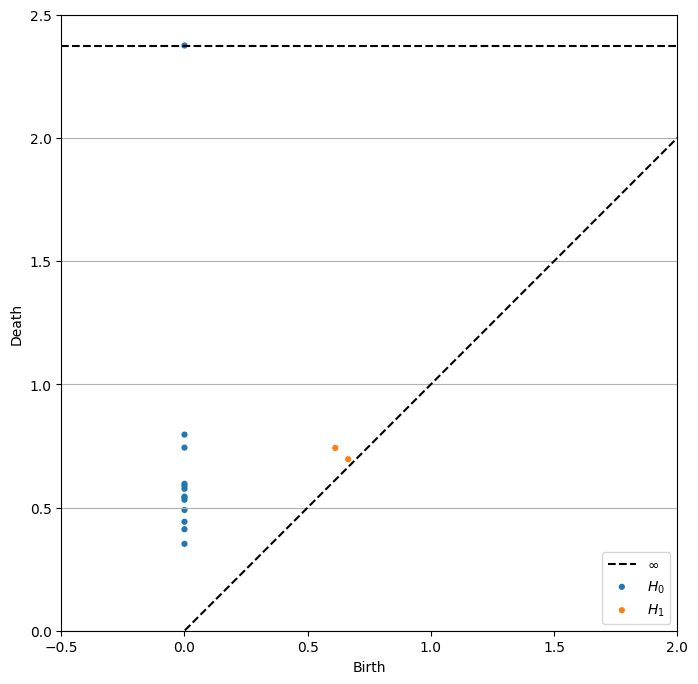

In [367]:
dgCRY = ripser(arrayPointsCRY)['dgms']
plt.grid(axis='y')
plot_diagrams(dgCRY, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

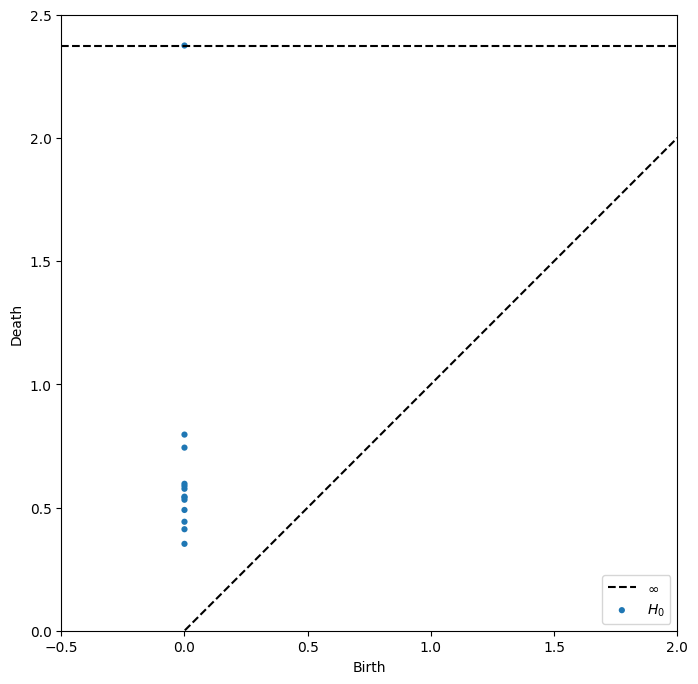

In [368]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgCRY_H0 = ripser(arrayPointsCRY)['dgms'][0]
plot_diagrams(dgCRY_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

##BRE - Brentford - 13

In [369]:
bre = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/BRE.csv')
bre

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,P. Jansson,2,3,37,37,3322,3,22,11,0,2,1,1205,5,15,8,7,0,73,40,8,0
1,2,C. Norgaard,3,3,35,35,3059,3,27,9,0,18,4,1331,29,56,33,8,0,124,109,8,0
2,3,B. Mbeumo,3,3,35,34,2915,4,77,22,1,39,7,504,34,20,38,4,0,27,28,9,0
3,4,I. Toney,4,3,33,32,2908,12,88,30,5,24,5,431,43,50,80,8,0,35,33,8,0
4,5,R. Henry,2,3,34,33,2784,3,14,5,0,27,0,761,18,20,27,2,0,46,28,9,0
5,6,E. Pinnock,2,3,32,32,2697,1,16,9,0,9,1,1067,11,9,14,1,0,79,51,7,0
6,7,V. Janelt,3,3,31,27,2307,4,30,11,0,13,0,740,23,26,25,3,0,60,61,8,0
7,8,Sergi Canos,3,3,31,25,2094,3,33,13,0,23,2,420,17,28,15,6,1,47,56,6,0
8,9,K. Ajer,2,3,24,23,1987,1,7,1,0,13,3,504,8,12,16,5,0,44,29,7,0
9,10,M. Jensen,3,3,31,19,1600,0,19,5,0,15,1,538,35,19,6,0,0,40,33,3,0


In [370]:
features_names = bre.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [371]:
scaler = MinMaxScaler()
bre[features_names] = scaler.fit_transform(bre[features_names])
bre

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,P. Jansson,2,3,1.000000,1.00,1.000000,0.250000,0.204819,0.344828,0.0,0.000000,0.142857,0.889956,0.025641,0.145833,0.027027,0.875,0.0,0.536364,0.288660,0.875,0.0
1,2,C. Norgaard,3,3,0.882353,0.92,0.884243,0.250000,0.265060,0.275862,0.0,0.432432,0.571429,1.000000,0.641026,1.000000,0.364865,1.000,0.0,1.000000,1.000000,0.875,0.0
2,3,B. Mbeumo,3,3,0.882353,0.88,0.820863,0.333333,0.867470,0.724138,0.2,1.000000,1.000000,0.277729,0.769231,0.250000,0.432432,0.500,0.0,0.118182,0.164948,1.000,0.0
3,4,I. Toney,4,3,0.764706,0.80,0.817782,1.000000,1.000000,1.000000,1.0,0.594595,0.714286,0.213974,1.000000,0.875000,1.000000,1.000,0.0,0.190909,0.216495,0.875,0.0
4,5,R. Henry,2,3,0.823529,0.84,0.763204,0.250000,0.108434,0.137931,0.0,0.675676,0.000000,0.502183,0.358974,0.250000,0.283784,0.250,0.0,0.290909,0.164948,1.000,0.0
5,6,E. Pinnock,2,3,0.705882,0.80,0.724912,0.083333,0.132530,0.275862,0.0,0.189189,0.142857,0.769432,0.179487,0.020833,0.108108,0.125,0.0,0.590909,0.402062,0.750,0.0
6,7,V. Janelt,3,3,0.647059,0.60,0.553257,0.333333,0.301205,0.344828,0.0,0.297297,0.000000,0.483843,0.487179,0.375000,0.256757,0.375,0.0,0.418182,0.505155,0.875,0.0
7,8,Sergi Canos,3,3,0.647059,0.52,0.459507,0.250000,0.337349,0.413793,0.0,0.567568,0.285714,0.204367,0.333333,0.416667,0.121622,0.750,1.0,0.300000,0.453608,0.625,0.0
8,9,K. Ajer,2,3,0.235294,0.44,0.412412,0.083333,0.024096,0.000000,0.0,0.297297,0.428571,0.277729,0.102564,0.083333,0.135135,0.625,0.0,0.272727,0.175258,0.750,0.0
9,10,M. Jensen,3,3,0.647059,0.28,0.242077,0.000000,0.168675,0.137931,0.0,0.351351,0.142857,0.307424,0.794872,0.229167,0.000000,0.000,0.0,0.236364,0.216495,0.250,0.0


In [372]:
arrayPointsBRE = np.array(bre[zestaw2])
#arrayPoints

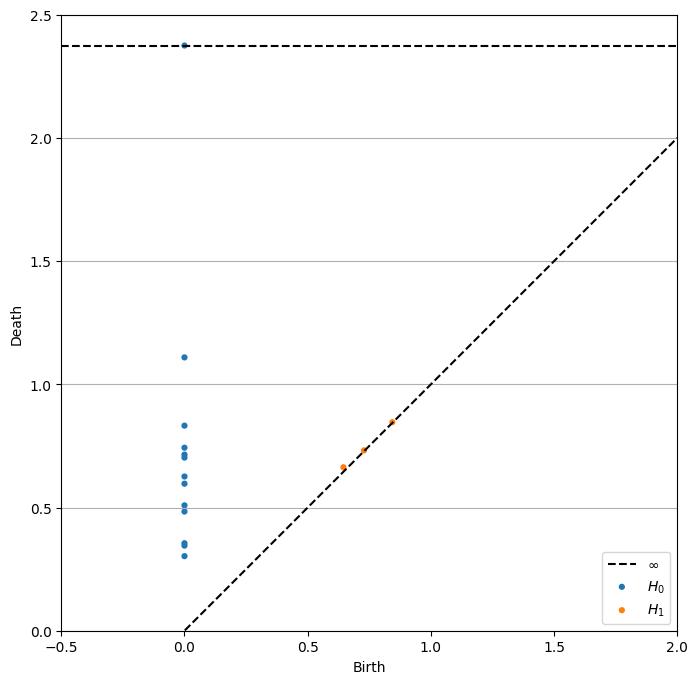

In [373]:
dgBRE = ripser(arrayPointsBRE)['dgms']
plt.grid(axis='y')
plot_diagrams(dgBRE, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

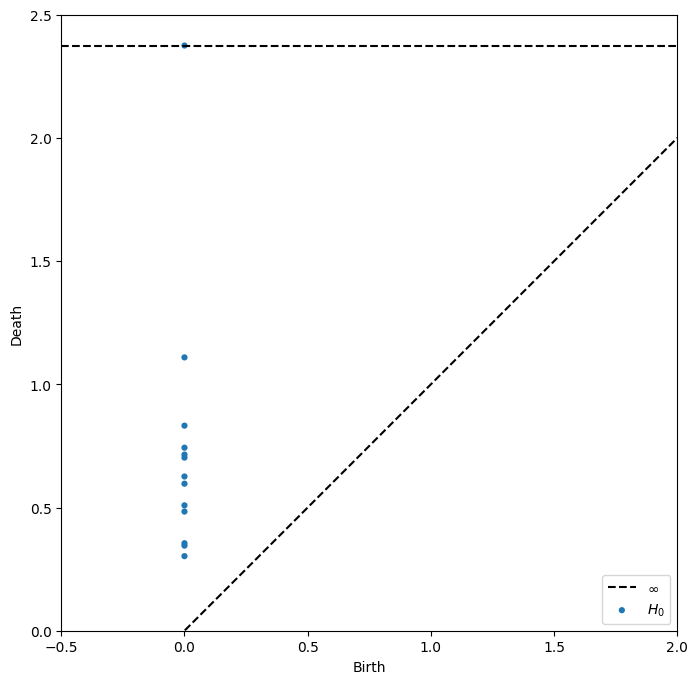

In [374]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgBRE_H0 = ripser(arrayPointsBRE)['dgms'][0]
plot_diagrams(dgBRE_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

##AVL - Aston Villa - 14


In [375]:
avl = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/AVL.csv')
avl

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Cash,2,2,38,38,3380,4,37,13,0,33,3,883,28,38,38,8,0,98,88,11,0
1,2,T. Mings,2,2,36,35,3188,1,21,5,0,11,3,1316,10,27,24,11,0,58,23,11,0
2,3,J. McGinn,3,2,35,35,3092,3,43,16,0,44,4,986,51,57,80,8,0,99,106,10,0
3,4,O. Watkins,4,2,35,33,2955,11,77,32,1,37,2,479,35,32,39,7,0,25,17,10,0
4,5,Douglas Luiz,3,2,34,31,2721,2,23,8,0,24,3,1257,37,38,41,7,0,73,60,9,0
5,6,E. Konsa,2,2,29,29,2481,2,15,6,0,6,0,864,4,18,36,4,2,30,25,8,0
6,7,J. Ramsey,3,2,34,29,2476,6,34,11,0,30,1,882,21,32,44,6,0,68,67,11,0
7,8,L. Digne,2,2,29,29,2442,0,18,3,0,11,4,874,52,33,25,6,0,66,46,7,0
8,9,D. Ings,4,2,30,22,1904,7,49,18,1,10,6,250,15,16,12,4,0,22,23,7,0
9,10,E. Buendia,3,2,35,22,1901,4,44,13,0,40,6,695,48,17,44,1,0,27,38,4,0


In [376]:
features_names = avl.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [377]:
scaler = MinMaxScaler()
avl[features_names] = scaler.fit_transform(avl[features_names])
avl

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Cash,2,2,1.00,1.000000,1.000000,0.363636,0.444444,0.387097,0.0,0.750000,0.500000,0.593809,0.510204,0.612245,0.454545,0.727273,0.0,0.987952,0.797753,1.000,0.0
1,2,T. Mings,2,2,0.92,0.892857,0.919328,0.090909,0.222222,0.129032,0.0,0.250000,0.500000,1.000000,0.142857,0.387755,0.272727,1.000000,0.0,0.506024,0.067416,1.000,0.0
2,3,J. McGinn,3,2,0.88,0.892857,0.878992,0.272727,0.527778,0.483871,0.0,1.000000,0.666667,0.690432,0.979592,1.000000,1.000000,0.727273,0.0,1.000000,1.000000,0.875,0.0
3,4,O. Watkins,4,2,0.88,0.821429,0.821429,1.000000,1.000000,1.000000,1.0,0.840909,0.333333,0.214822,0.653061,0.489796,0.467532,0.636364,0.0,0.108434,0.000000,0.875,0.0
4,5,Douglas Luiz,3,2,0.84,0.750000,0.723109,0.181818,0.250000,0.225806,0.0,0.545455,0.500000,0.944653,0.693878,0.612245,0.493506,0.636364,0.0,0.686747,0.483146,0.750,0.0
5,6,E. Konsa,2,2,0.64,0.678571,0.622269,0.181818,0.138889,0.161290,0.0,0.136364,0.000000,0.575985,0.020408,0.204082,0.428571,0.363636,1.0,0.168675,0.089888,0.625,0.0
6,7,J. Ramsey,3,2,0.84,0.678571,0.620168,0.545455,0.402778,0.322581,0.0,0.681818,0.166667,0.592871,0.367347,0.489796,0.532468,0.545455,0.0,0.626506,0.561798,1.000,0.0
7,8,L. Digne,2,2,0.64,0.678571,0.605882,0.000000,0.180556,0.064516,0.0,0.250000,0.666667,0.585366,1.000000,0.510204,0.285714,0.545455,0.0,0.602410,0.325843,0.500,0.0
8,9,D. Ings,4,2,0.68,0.428571,0.379832,0.636364,0.611111,0.548387,1.0,0.227273,1.000000,0.000000,0.244898,0.163265,0.116883,0.363636,0.0,0.072289,0.067416,0.500,0.0
9,10,E. Buendia,3,2,0.88,0.428571,0.378571,0.363636,0.541667,0.387097,0.0,0.909091,1.000000,0.417448,0.918367,0.183673,0.532468,0.090909,0.0,0.132530,0.235955,0.125,0.0


In [378]:
arrayPointsAVL = np.array(avl[zestaw2])
#arrayPoints

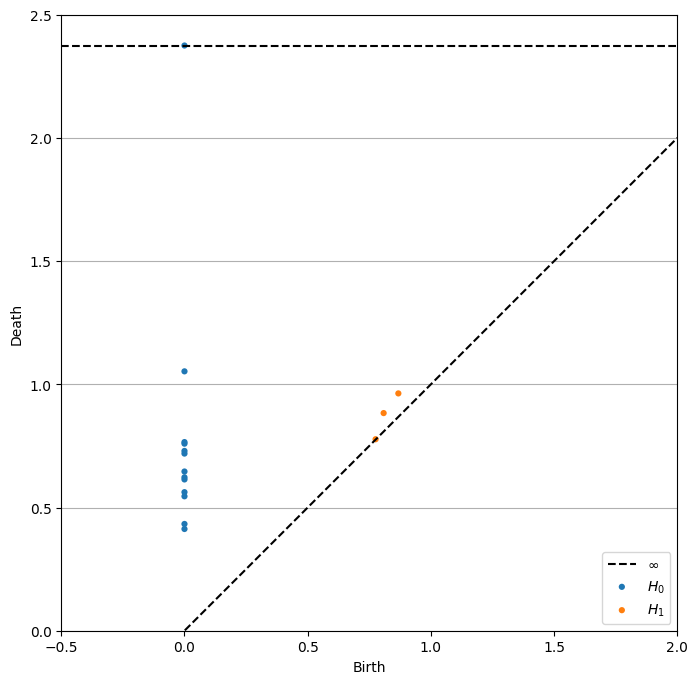

In [379]:
dgAVL = ripser(arrayPointsAVL)['dgms']
plt.grid(axis='y')
plot_diagrams(dgAVL, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

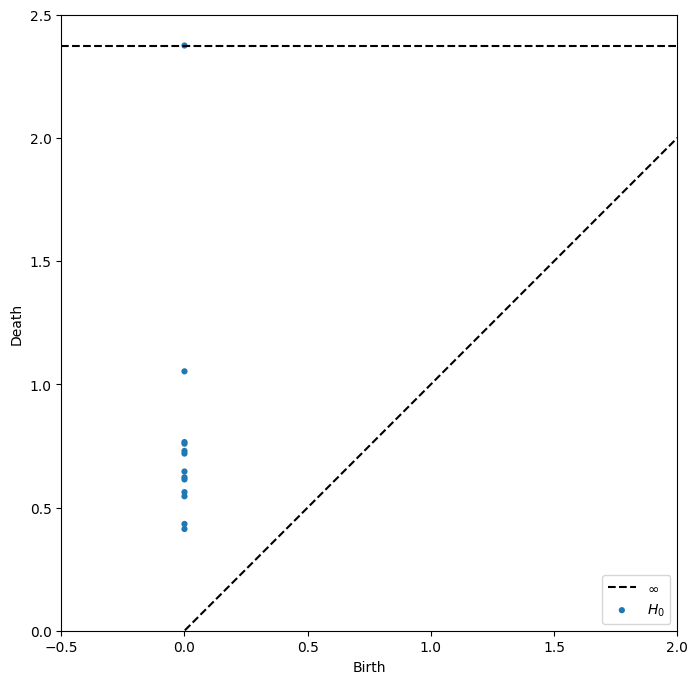

In [380]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgAVL_H0 = ripser(arrayPointsAVL)['dgms'][0]
plot_diagrams(dgAVL_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

##SOU - Southampton - 15

In [381]:
sou = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/SOU.csv')
sou

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,J. Ward-Prowse,3,16,36,36,3217,10,55,24,4,12,5,1578,71,22,15,3,1,64,41,7,0
1,2,M. Salisu,2,16,34,33,2972,0,24,10,0,13,0,1356,9,38,7,8,1,125,80,6,0
2,3,Oriol Romeu,3,16,36,34,2895,2,24,4,0,30,2,1372,37,46,24,9,0,90,77,7,0
3,4,K. Walker-Peters,2,16,32,29,2632,1,26,7,0,64,2,885,24,27,47,5,0,70,57,6,0
4,5,J. Bednarek,2,16,31,30,2631,4,19,7,0,1,0,1181,6,30,15,10,0,87,32,7,0
5,6,V. Livramento,3,16,28,25,2203,1,12,3,0,30,1,712,20,12,36,2,0,75,54,7,0
6,7,M. Elyounoussi,3,16,30,23,2043,4,43,19,0,28,2,426,28,28,18,4,0,29,36,8,0
7,8,C. Adams,4,16,30,23,2041,7,49,24,0,20,3,303,26,29,40,0,0,13,13,5,0
8,9,A. Broja,4,16,32,21,1978,6,45,21,0,33,0,243,10,29,26,2,0,8,12,4,0
9,10,N. Redmond,3,16,27,20,1832,1,26,9,0,21,5,490,34,16,15,0,0,22,22,4,0


In [382]:
features_names = sou.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [383]:
scaler = MinMaxScaler()
sou[features_names] = scaler.fit_transform(sou[features_names])
sou

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,J. Ward-Prowse,3,16,1.0000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,0.174603,1.0,1.000000,1.000000,0.314286,0.219512,0.3,1.0,0.483051,0.442857,0.8,0.0
1,2,M. Salisu,2,16,0.8750,0.857143,0.864115,0.0,0.279070,0.333333,0.0,0.190476,0.0,0.835677,0.046154,0.771429,0.024390,0.8,1.0,1.000000,1.000000,0.6,0.0
2,3,Oriol Romeu,3,16,1.0000,0.904762,0.821409,0.2,0.279070,0.047619,0.0,0.460317,0.4,0.847520,0.476923,1.000000,0.439024,0.9,0.0,0.703390,0.957143,0.8,0.0
3,4,K. Walker-Peters,2,16,0.7500,0.666667,0.675541,0.1,0.325581,0.190476,0.0,1.000000,0.4,0.487047,0.276923,0.457143,1.000000,0.5,0.0,0.533898,0.671429,0.6,0.0
4,5,J. Bednarek,2,16,0.6875,0.714286,0.674986,0.4,0.162791,0.190476,0.0,0.000000,0.0,0.706144,0.000000,0.542857,0.219512,1.0,0.0,0.677966,0.314286,0.8,0.0
5,6,V. Livramento,3,16,0.5000,0.476190,0.437604,0.1,0.000000,0.000000,0.0,0.460317,0.2,0.358993,0.215385,0.028571,0.731707,0.2,0.0,0.576271,0.628571,0.8,0.0
6,7,M. Elyounoussi,3,16,0.6250,0.380952,0.348863,0.4,0.720930,0.761905,0.0,0.428571,0.4,0.147298,0.338462,0.485714,0.292683,0.4,0.0,0.186441,0.371429,1.0,0.0
7,8,C. Adams,4,16,0.6250,0.380952,0.347754,0.7,0.860465,1.000000,0.0,0.301587,0.6,0.056255,0.307692,0.514286,0.829268,0.0,0.0,0.050847,0.042857,0.4,0.0
8,9,A. Broja,4,16,0.7500,0.285714,0.312812,0.6,0.767442,0.857143,0.0,0.507937,0.0,0.011843,0.061538,0.514286,0.487805,0.2,0.0,0.008475,0.028571,0.2,0.0
9,10,N. Redmond,3,16,0.4375,0.238095,0.231836,0.1,0.325581,0.285714,0.0,0.317460,1.0,0.194671,0.430769,0.142857,0.219512,0.0,0.0,0.127119,0.171429,0.2,0.0


In [384]:
arrayPointsSOU = np.array(sou[zestaw2])
#arrayPoints

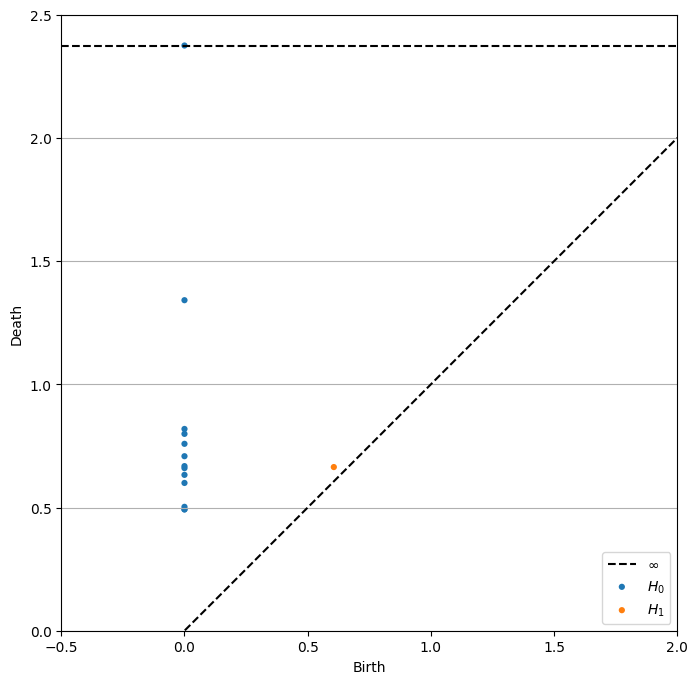

In [385]:
dgSOU = ripser(arrayPointsSOU)['dgms']
plt.grid(axis='y')
plot_diagrams(dgSOU, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

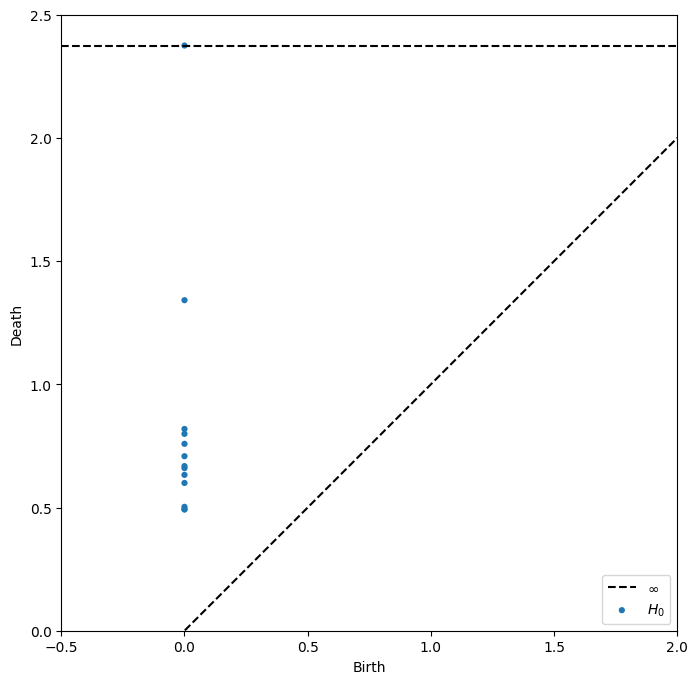

In [386]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgSOU_H0 = ripser(arrayPointsSOU)['dgms'][0]
plot_diagrams(dgSOU_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

##EVE - Everton - 16

In [387]:
eve = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/EVE.csv')
eve

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Keane,2,8,32,31,2792,3,20,6,0,7,2,927,8,16,7,2,1,87,46,7,0
1,2,S. Coleman,2,8,30,30,2658,1,8,1,0,34,0,706,13,14,17,4,0,68,61,7,0
2,3,A. Doucoure,3,8,30,29,2538,2,34,11,0,21,4,861,19,39,16,6,0,71,75,5,0
3,4,Richarlison,4,8,30,28,2526,10,72,23,3,40,5,331,29,36,68,9,0,35,40,7,0
4,5,D. Gray,3,8,34,28,2347,5,65,17,0,55,4,515,42,12,32,3,0,34,30,6,0
5,6,A. Gordon,3,8,35,25,2284,4,44,18,0,38,2,455,35,25,64,4,0,54,54,6,0
6,7,Allan,3,8,28,25,2186,0,7,3,0,21,2,766,15,30,22,7,1,67,74,6,0
7,8,M. Holgate,2,8,25,23,2133,2,7,3,0,2,1,577,3,26,15,7,1,44,35,5,0
8,9,A. Iwobi,3,8,28,22,2037,2,24,6,0,32,2,554,36,16,6,1,0,39,40,6,0
9,10,B. Godfrey,2,8,23,23,2031,0,18,7,0,9,0,540,12,17,12,6,0,47,47,4,0


In [388]:
features_names = eve.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [389]:
scaler = MinMaxScaler()
eve[features_names] = scaler.fit_transform(eve[features_names])
eve

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Keane,2,8,0.863636,1.000000,1.000000,0.3,0.200000,0.227273,0.000000,0.094340,0.4,1.000000,0.128205,0.206897,0.016129,0.222222,1.0,1.000000,0.546875,1.00,0.0
1,2,S. Coleman,2,8,0.772727,0.947368,0.922811,0.1,0.015385,0.000000,0.000000,0.603774,0.0,0.709593,0.256410,0.137931,0.177419,0.444444,0.0,0.750000,0.781250,1.00,0.0
2,3,A. Doucoure,3,8,0.772727,0.894737,0.853687,0.2,0.415385,0.454545,0.000000,0.358491,0.8,0.913272,0.410256,1.000000,0.161290,0.666667,0.0,0.789474,1.000000,0.50,0.0
3,4,Richarlison,4,8,0.772727,0.842105,0.846774,1.0,1.000000,1.000000,1.000000,0.716981,1.0,0.216820,0.666667,0.896552,1.000000,1.000000,0.0,0.315789,0.453125,1.00,0.0
4,5,D. Gray,3,8,0.954545,0.842105,0.743664,0.5,0.892308,0.727273,0.000000,1.000000,0.8,0.458607,1.000000,0.068966,0.419355,0.333333,0.0,0.302632,0.296875,0.75,0.0
5,6,A. Gordon,3,8,1.000000,0.684211,0.707373,0.4,0.569231,0.772727,0.000000,0.679245,0.4,0.379763,0.820513,0.517241,0.935484,0.444444,0.0,0.565789,0.671875,0.75,0.0
6,7,Allan,3,8,0.681818,0.684211,0.650922,0.0,0.000000,0.090909,0.000000,0.358491,0.4,0.788436,0.307692,0.689655,0.258065,0.777778,1.0,0.736842,0.984375,0.75,0.0
7,8,M. Holgate,2,8,0.545455,0.578947,0.620392,0.2,0.000000,0.090909,0.000000,0.000000,0.2,0.540079,0.000000,0.551724,0.145161,0.777778,1.0,0.434211,0.375000,0.50,0.0
8,9,A. Iwobi,3,8,0.681818,0.526316,0.565092,0.2,0.261538,0.227273,0.000000,0.566038,0.4,0.509855,0.846154,0.206897,0.000000,0.111111,0.0,0.368421,0.453125,0.75,0.0
9,10,B. Godfrey,2,8,0.454545,0.578947,0.561636,0.0,0.169231,0.272727,0.000000,0.132075,0.0,0.491459,0.230769,0.241379,0.096774,0.666667,0.0,0.473684,0.562500,0.25,0.0


In [390]:
arrayPointsEVE = np.array(eve[zestaw2])
#arrayPoints

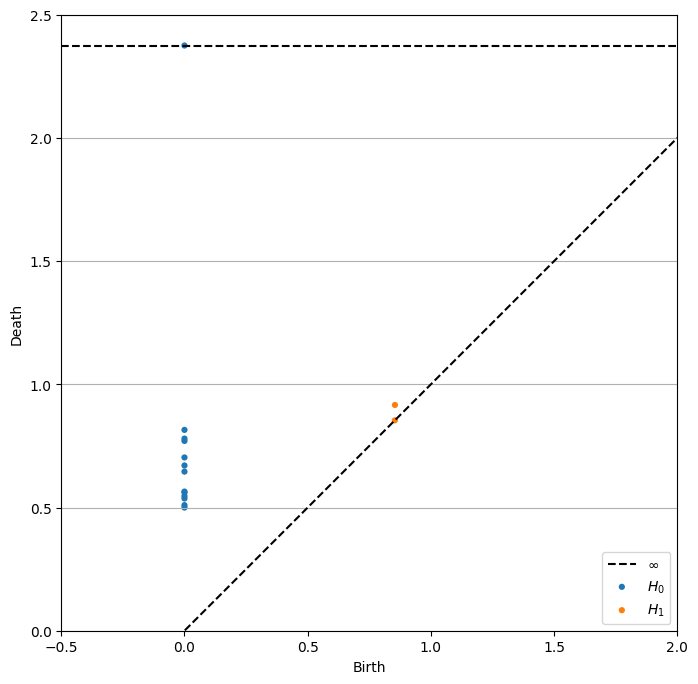

In [391]:
dgEVE = ripser(arrayPointsEVE)['dgms']
plt.grid(axis='y')
plot_diagrams(dgEVE, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

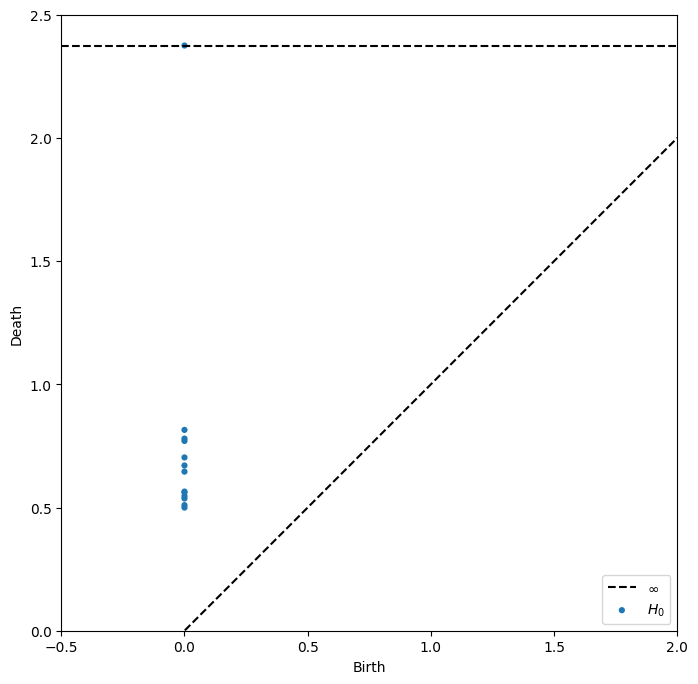

In [392]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgEVE_H0 = ripser(arrayPointsEVE)['dgms'][0]
plot_diagrams(dgEVE_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

##LEE - Leeds United - 17

In [393]:
lee = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/LEE.csv')
lee

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,S. Dallas,2,9,34,34,2922,1,30,9,0,29,1,1066,31,33,30,5,0,112,93,5,0
1,2,Raphinha,3,9,35,34,2922,11,88,25,4,62,3,744,65,40,47,7,0,58,51,5,0
2,3,J. Harrison,3,9,35,32,2648,8,43,17,0,54,1,613,42,29,23,3,0,58,57,3,0
3,4,D. James,3,9,34,31,2500,4,54,18,0,21,4,336,27,31,38,7,1,23,26,4,0
4,5,Diego Llorente,2,9,28,28,2343,3,10,3,0,8,0,1105,2,23,21,7,0,71,53,5,0
5,6,L. Ayling,2,9,26,26,2275,2,19,4,0,23,2,1098,12,22,19,4,1,70,74,2,0
6,7,Rodrigo,4,9,31,27,2270,6,47,18,1,22,1,658,38,21,30,9,0,20,20,4,0
7,8,M. Klich,3,9,33,26,2079,1,42,18,0,20,2,781,31,40,15,5,0,36,47,1,0
8,9,P. Struijk,2,9,29,22,2051,1,11,4,0,2,0,1068,11,25,8,6,1,72,61,0,0
9,10,L. Cooper,2,9,21,21,1815,0,6,1,0,3,1,976,4,19,9,5,0,66,41,5,0


In [394]:
features_names = lee.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [395]:
scaler = MinMaxScaler()
lee[features_names] = scaler.fit_transform(lee[features_names])
lee

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,S. Dallas,2,9,0.933333,1.000000,1.000000,0.090909,0.292683,0.333333,0.00,0.450000,0.25,0.949285,0.460317,0.666667,0.564103,0.250,0.0,1.000000,1.000000,1.0,0.0
1,2,Raphinha,3,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,0.75,0.530559,1.000000,1.000000,1.000000,0.500,0.0,0.413043,0.424658,1.0,0.0
2,3,J. Harrison,3,9,1.000000,0.882353,0.796736,0.727273,0.451220,0.666667,0.00,0.866667,0.25,0.360208,0.634921,0.476190,0.384615,0.000,0.0,0.413043,0.506849,0.6,0.0
3,4,D. James,3,9,0.933333,0.823529,0.686944,0.363636,0.585366,0.708333,0.00,0.316667,1.00,0.000000,0.396825,0.571429,0.769231,0.500,1.0,0.032609,0.082192,0.8,0.0
4,5,Diego Llorente,2,9,0.533333,0.647059,0.570475,0.272727,0.048780,0.083333,0.00,0.100000,0.00,1.000000,0.000000,0.190476,0.333333,0.500,0.0,0.554348,0.452055,1.0,0.0
5,6,L. Ayling,2,9,0.400000,0.529412,0.520030,0.181818,0.158537,0.125000,0.00,0.350000,0.50,0.990897,0.158730,0.142857,0.282051,0.125,1.0,0.543478,0.739726,0.4,0.0
6,7,Rodrigo,4,9,0.733333,0.588235,0.516320,0.545455,0.500000,0.708333,0.25,0.333333,0.25,0.418726,0.571429,0.095238,0.564103,0.750,0.0,0.000000,0.000000,0.8,0.0
7,8,M. Klich,3,9,0.866667,0.529412,0.374629,0.090909,0.439024,0.708333,0.00,0.300000,0.50,0.578674,0.460317,1.000000,0.179487,0.250,0.0,0.173913,0.369863,0.2,0.0
8,9,P. Struijk,2,9,0.600000,0.294118,0.353858,0.090909,0.060976,0.125000,0.00,0.000000,0.00,0.951886,0.142857,0.285714,0.000000,0.375,1.0,0.565217,0.561644,0.0,0.0
9,10,L. Cooper,2,9,0.066667,0.235294,0.178783,0.000000,0.000000,0.000000,0.00,0.016667,0.25,0.832250,0.031746,0.000000,0.025641,0.250,0.0,0.500000,0.287671,1.0,0.0


In [396]:
arrayPointsLEE = np.array(lee[zestaw2])
#arrayPoints

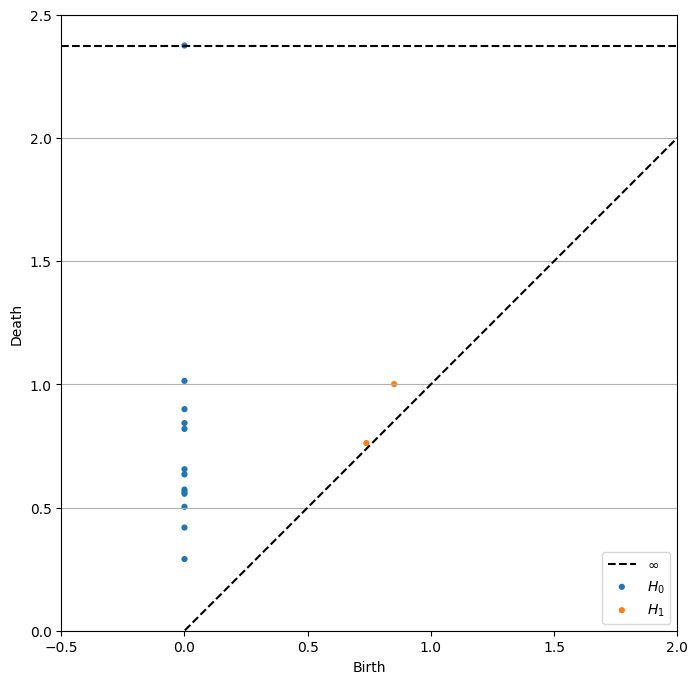

In [397]:
dgLEE = ripser(arrayPointsLEE)['dgms']
plt.grid(axis='y')
plot_diagrams(dgLEE, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

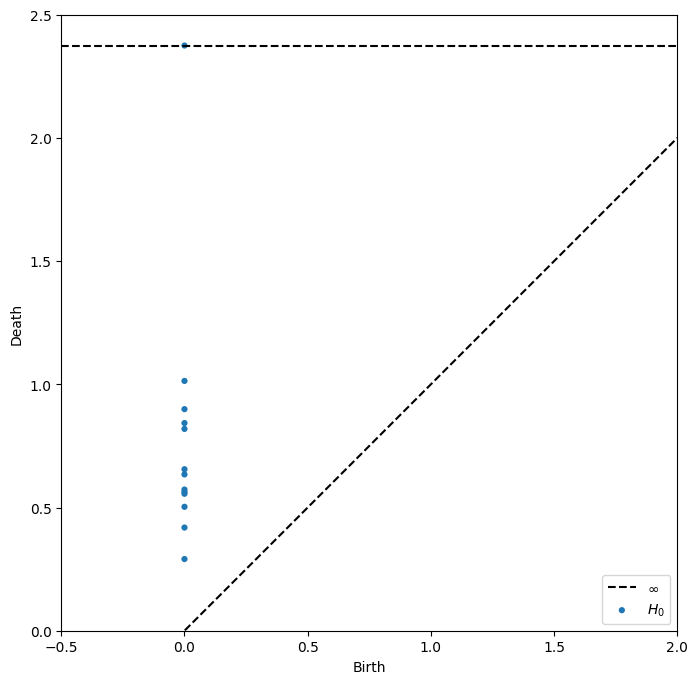

In [398]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgLEE_H0 = ripser(arrayPointsLEE)['dgms'][0]
plot_diagrams(dgLEE_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

##BRN - Burnley - 18

In [399]:
brn = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/BRN.csv')
brn

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,D. McNeil,3,5,38,35,3112,0,52,15,0,90,1,730,47,16,36,1,0,84,78,9,0
1,2,J. Tarkowski,2,5,35,35,3107,1,22,6,0,5,2,812,10,30,19,11,0,93,64,7,0
2,3,J. Brownhill,3,5,35,32,2953,2,29,9,0,15,3,870,40,39,20,10,0,105,73,7,0
3,4,C. Taylor,2,5,31,30,2730,0,7,0,0,27,3,697,21,17,43,3,0,84,45,5,0
4,5,A. Westwood,3,5,27,26,2289,0,14,2,0,10,3,837,33,29,22,7,0,42,21,4,0
5,6,B. Mee,2,5,21,21,1840,3,19,4,0,4,0,529,5,9,7,3,0,36,26,6,0
6,7,M. Cornet,2,5,26,21,1776,9,47,22,0,13,1,266,15,20,20,2,0,19,16,3,0
7,8,M. Lowton,2,5,25,20,1771,1,10,2,0,10,2,437,18,13,6,3,1,50,38,3,0
8,9,C. Roberts,2,5,21,19,1691,1,6,4,0,6,1,471,13,7,29,2,0,35,20,6,0
9,10,J. Cork,3,5,20,20,1676,1,7,2,0,7,0,419,6,31,10,4,0,23,20,6,0


In [400]:
features_names = brn.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [401]:
scaler = MinMaxScaler()
brn[features_names] = scaler.fit_transform(brn[features_names])
brn

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,D. McNeil,3,5,1.000000,1.000000,1.000000,0.000000,1.000000,0.681818,0.0,1.000000,0.333333,0.775281,1.000000,0.28125,0.810811,0.0,0.0,0.766667,1.000000,1.000000,0.0
1,2,J. Tarkowski,2,5,0.842105,1.000000,0.996979,0.111111,0.347826,0.272727,0.0,0.011628,0.666667,0.906902,0.119048,0.71875,0.351351,1.0,0.0,0.866667,0.774194,0.666667,0.0
2,3,J. Brownhill,3,5,0.842105,0.833333,0.903927,0.222222,0.500000,0.409091,0.0,0.127907,1.000000,1.000000,0.833333,1.00000,0.378378,0.9,0.0,1.000000,0.919355,0.666667,0.0
3,4,C. Taylor,2,5,0.631579,0.722222,0.769184,0.000000,0.021739,0.000000,0.0,0.267442,1.000000,0.722311,0.380952,0.31250,1.000000,0.2,0.0,0.766667,0.467742,0.333333,0.0
4,5,A. Westwood,3,5,0.421053,0.500000,0.502719,0.000000,0.173913,0.090909,0.0,0.069767,1.000000,0.947030,0.666667,0.68750,0.432432,0.6,0.0,0.300000,0.080645,0.166667,0.0
5,6,B. Mee,2,5,0.105263,0.222222,0.231420,0.333333,0.282609,0.181818,0.0,0.000000,0.000000,0.452648,0.000000,0.06250,0.027027,0.2,0.0,0.233333,0.161290,0.500000,0.0
6,7,M. Cornet,2,5,0.368421,0.222222,0.192749,1.000000,0.891304,1.000000,0.0,0.104651,0.333333,0.030498,0.238095,0.40625,0.378378,0.1,0.0,0.044444,0.000000,0.000000,0.0
7,8,M. Lowton,2,5,0.315789,0.166667,0.189728,0.111111,0.086957,0.090909,0.0,0.069767,0.666667,0.304976,0.309524,0.18750,0.000000,0.2,1.0,0.388889,0.354839,0.000000,0.0
8,9,C. Roberts,2,5,0.105263,0.111111,0.141390,0.111111,0.000000,0.181818,0.0,0.023256,0.333333,0.359551,0.190476,0.00000,0.621622,0.1,0.0,0.222222,0.064516,0.500000,0.0
9,10,J. Cork,3,5,0.052632,0.166667,0.132326,0.111111,0.021739,0.090909,0.0,0.034884,0.000000,0.276083,0.023810,0.75000,0.108108,0.3,0.0,0.088889,0.064516,0.500000,0.0


In [402]:
arrayPointsBRN = np.array(brn[zestaw2])
#arrayPoints

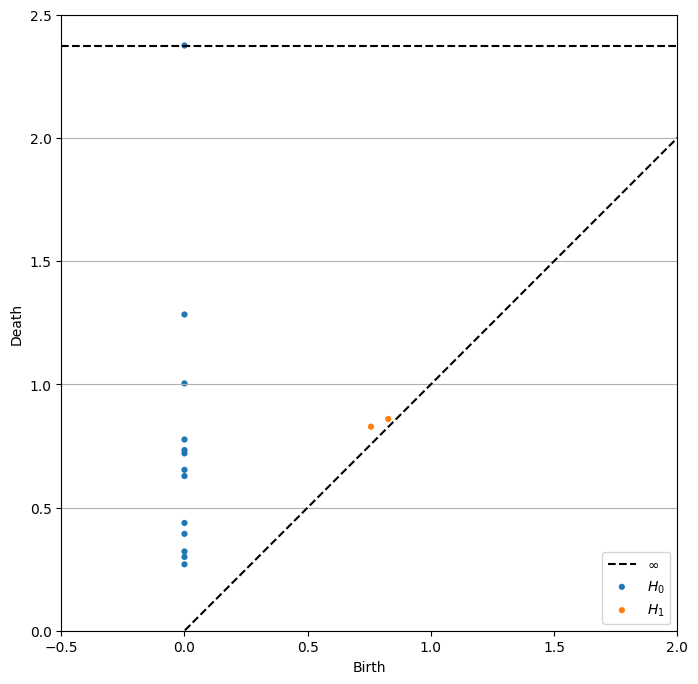

In [403]:
dgBRN = ripser(arrayPointsBRN)['dgms']
plt.grid(axis='y')
plot_diagrams(dgBRN, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

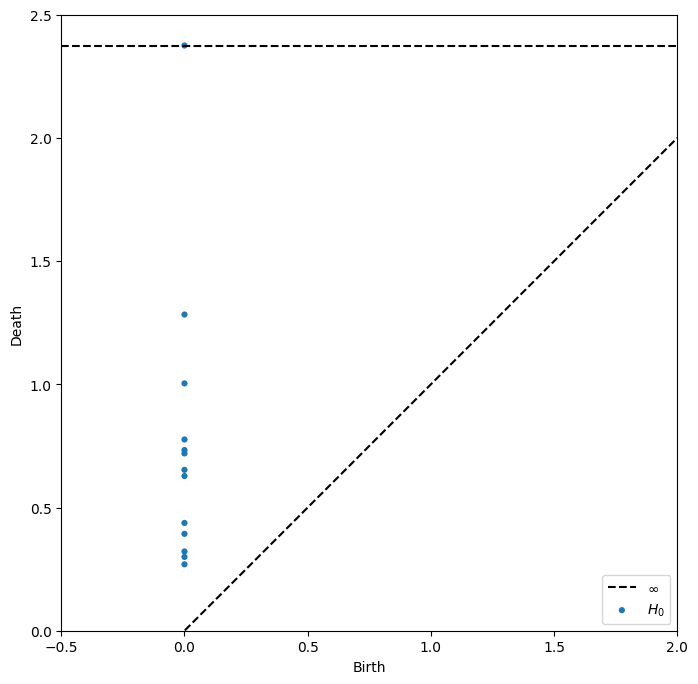

In [404]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgBRN_H0 = ripser(arrayPointsBRN)['dgms'][0]
plot_diagrams(dgBRN_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

## WAT - Watford - 19

In [405]:
wat = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/WAT.csv')
wat

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Sissoko,3,18,36,36,3221,2,25,8,0,52,1,896,36,36,11,5,0,57,53,4,0
1,2,E. Dennis,4,18,33,30,2589,10,60,26,0,68,6,393,33,59,40,7,1,50,51,2,0
2,3,C. Cathcart,2,18,31,27,2395,0,3,0,0,0,1,734,3,13,4,3,0,43,32,3,0
3,4,J. King,4,18,32,27,2249,5,50,17,1,30,3,364,35,42,21,5,0,23,19,3,0
4,5,Kiko Femenia,2,18,27,26,2149,0,3,1,0,7,5,646,25,12,13,2,0,59,35,2,0
5,6,J. Kucka,3,18,26,22,1923,1,46,11,0,17,1,466,10,46,49,3,1,66,59,1,0
6,7,I. Sarr,3,18,22,21,1864,5,39,17,0,34,2,321,21,17,47,2,0,16,12,2,0
7,8,Joao Pedro,4,18,28,15,1638,3,47,16,0,62,1,383,19,13,30,1,0,29,20,2,0
8,9,H. Kamara,2,18,19,18,1625,1,5,1,0,15,0,499,10,24,16,3,1,103,53,3,0
9,10,T. Cleverley,3,18,28,20,1623,0,12,7,0,3,2,456,20,28,19,2,0,38,37,2,0


In [406]:
features_names = wat.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [407]:
scaler = MinMaxScaler()
wat[features_names] = scaler.fit_transform(wat[features_names])
wat

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,M. Sissoko,3,18,1.00,1.000000,1.000000,0.2,0.396552,0.307692,0.0,0.764706,0.166667,1.000000,1.000000,0.574074,0.191489,0.714286,0.0,0.471264,0.875000,1.00,0.0
1,2,E. Dennis,4,18,0.85,0.750000,0.688823,1.0,1.000000,1.000000,0.0,1.000000,1.000000,0.125217,0.914286,1.000000,0.808511,1.000000,1.0,0.390805,0.833333,0.50,0.0
2,3,C. Cathcart,2,18,0.75,0.625000,0.593304,0.0,0.017241,0.000000,0.0,0.000000,0.166667,0.718261,0.057143,0.148148,0.042553,0.428571,0.0,0.310345,0.437500,0.75,0.0
3,4,J. King,4,18,0.80,0.625000,0.521418,0.5,0.827586,0.653846,1.0,0.441176,0.500000,0.074783,0.971429,0.685185,0.404255,0.714286,0.0,0.080460,0.166667,0.75,0.0
4,5,Kiko Femenia,2,18,0.55,0.583333,0.472181,0.0,0.017241,0.038462,0.0,0.102941,0.833333,0.565217,0.685714,0.129630,0.234043,0.285714,0.0,0.494253,0.500000,0.50,0.0
5,6,J. Kucka,3,18,0.50,0.416667,0.360906,0.1,0.758621,0.423077,0.0,0.250000,0.166667,0.252174,0.257143,0.759259,1.000000,0.428571,1.0,0.574713,1.000000,0.25,0.0
6,7,I. Sarr,3,18,0.30,0.375000,0.331856,0.5,0.637931,0.653846,0.0,0.500000,0.333333,0.000000,0.571429,0.222222,0.957447,0.285714,0.0,0.000000,0.020833,0.50,0.0
7,8,Joao Pedro,4,18,0.60,0.125000,0.220581,0.3,0.775862,0.615385,0.0,0.911765,0.166667,0.107826,0.514286,0.148148,0.595745,0.142857,0.0,0.149425,0.187500,0.50,0.0
8,9,H. Kamara,2,18,0.15,0.250000,0.214180,0.1,0.051724,0.038462,0.0,0.220588,0.000000,0.309565,0.257143,0.351852,0.297872,0.428571,1.0,1.000000,0.875000,0.75,0.0
9,10,T. Cleverley,3,18,0.60,0.333333,0.213195,0.0,0.172414,0.269231,0.0,0.044118,0.333333,0.234783,0.542857,0.425926,0.361702,0.285714,0.0,0.252874,0.541667,0.50,0.0


In [408]:
arrayPointsWAT = np.array(wat[zestaw2])
#arrayPoints

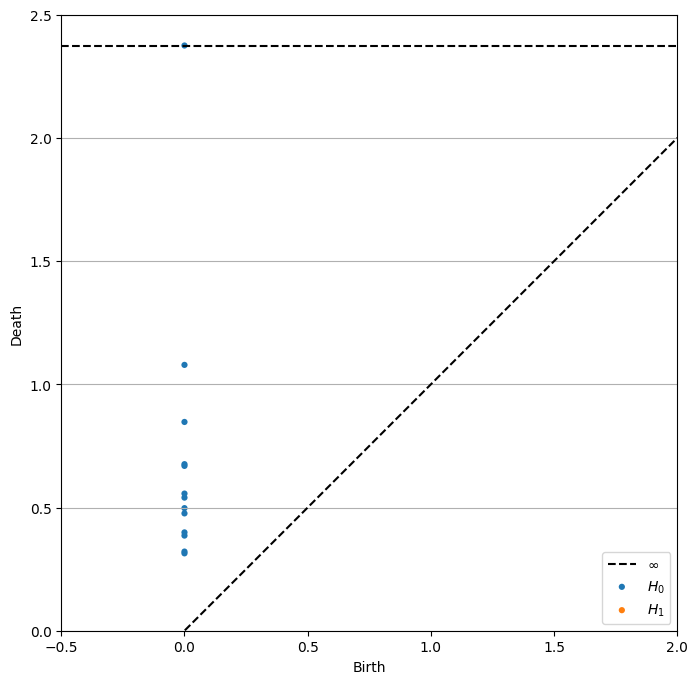

In [409]:
dgWAT = ripser(arrayPointsWAT)['dgms']
plt.grid(axis='y')
plot_diagrams(dgWAT, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

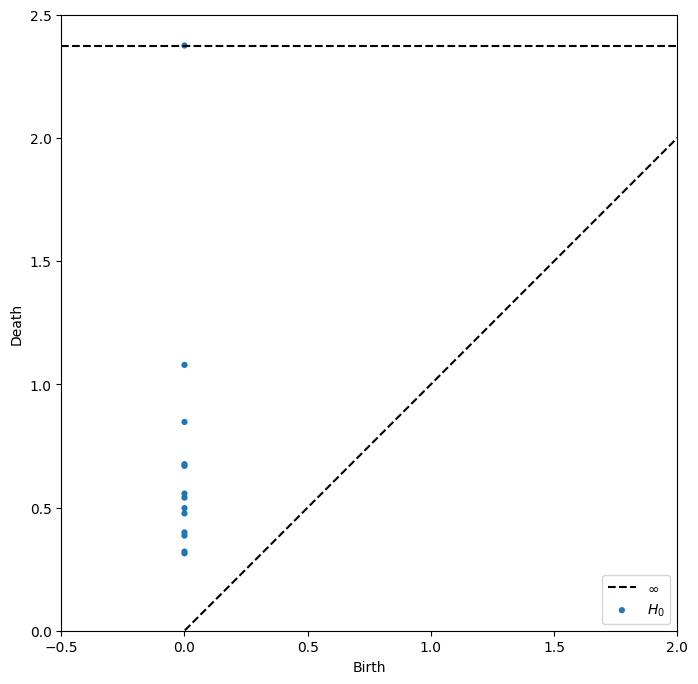

In [410]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgWAT_H0 = ripser(arrayPointsWAT)['dgms'][0]
plot_diagrams(dgWAT_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

##NOR - Norwich City - 20

In [411]:
nor = pd.read_csv('https://raw.githubusercontent.com/wojtaskuba/Projekt_WamberskaWojtasZygmunt/main/Teams/TeamSet2/NOR.csv')
nor

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,T. Pukki,4,15,37,37,3260,11,71,27,3,27,3,394,27,31,25,4,0,15,23,6,0
1,2,G. Hanley,2,15,33,33,2899,1,20,4,0,1,0,1089,6,22,22,2,0,81,44,6,0
2,3,M. Aarons,2,15,34,32,2882,0,13,2,0,34,2,847,20,27,52,8,0,72,64,4,0
3,4,K. McLean,3,15,31,29,2706,1,33,6,0,19,0,771,10,16,38,3,0,56,42,6,0
4,5,B. Gibson,2,15,28,28,2495,0,8,4,0,5,0,1111,3,12,9,3,1,43,23,6,0
5,6,P. Lees Melou,3,15,33,27,2270,1,33,9,0,19,0,788,25,35,23,5,0,61,58,5,0
6,7,M. Rashica,4,15,31,25,2236,1,44,17,0,16,2,325,36,23,47,0,0,34,31,4,0
7,8,B. Williams,2,15,26,23,2123,0,4,1,0,20,1,764,21,23,44,8,0,81,55,2,0
8,9,B. Gilmour,3,15,24,21,1858,0,18,3,0,15,1,949,25,28,22,2,0,38,41,2,0
9,10,M. Normann,3,15,23,20,1652,1,26,5,0,17,2,536,13,37,28,6,0,40,34,4,0


In [412]:
features_names = nor.drop(['Player', 'Id', 'POS', 'Team'], axis=1).columns
features_names

Index(['Apps', 'Starter', 'Mins', 'Goals', 'Shots', 'OnTarShots', 'PenGoals',
       'SuccesfulDribbles', 'Assists', 'AccPasses', 'KeyPasses', 'Fouls',
       'WasFouled', 'YellowCards', 'RedCards', 'RecBalls', 'Tackles',
       'CleanSheets', 'Saves'],
      dtype='object')

In [413]:
scaler = MinMaxScaler()
nor[features_names] = scaler.fit_transform(nor[features_names])
nor

,Id,Player,POS,Team,Apps,Starter,Mins,Goals,Shots,OnTarShots,PenGoals,SuccesfulDribbles,Assists,AccPasses,KeyPasses,Fouls,WasFouled,YellowCards,RedCards,RecBalls,Tackles,CleanSheets,Saves
0,1,T. Pukki,4,15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.787879,1.000000,0.130909,0.727273,0.785714,0.437500,0.500,0.0,0.000000,0.000000,1.00,0.0
1,2,G. Hanley,2,15,0.818182,0.846154,0.838551,0.090909,0.260870,0.115385,0.0,0.000000,0.000000,0.973333,0.090909,0.464286,0.375000,0.250,0.0,1.000000,0.512195,1.00,0.0
2,3,M. Aarons,2,15,0.863636,0.807692,0.830948,0.000000,0.159420,0.038462,0.0,1.000000,0.666667,0.680000,0.515152,0.642857,1.000000,1.000,0.0,0.863636,1.000000,0.50,0.0
3,4,K. McLean,3,15,0.727273,0.692308,0.752236,0.090909,0.449275,0.192308,0.0,0.545455,0.000000,0.587879,0.212121,0.250000,0.708333,0.375,0.0,0.621212,0.463415,1.00,0.0
4,5,B. Gibson,2,15,0.590909,0.653846,0.657871,0.000000,0.086957,0.115385,0.0,0.121212,0.000000,1.000000,0.000000,0.107143,0.104167,0.375,1.0,0.424242,0.000000,1.00,0.0
5,6,P. Lees Melou,3,15,0.818182,0.615385,0.557245,0.090909,0.449275,0.307692,0.0,0.545455,0.000000,0.608485,0.666667,0.928571,0.395833,0.625,0.0,0.696970,0.853659,0.75,0.0
6,7,M. Rashica,4,15,0.727273,0.538462,0.542039,0.090909,0.608696,0.615385,0.0,0.454545,0.666667,0.047273,1.000000,0.500000,0.895833,0.000,0.0,0.287879,0.195122,0.50,0.0
7,8,B. Williams,2,15,0.500000,0.461538,0.491503,0.000000,0.028986,0.000000,0.0,0.575758,0.333333,0.579394,0.545455,0.500000,0.833333,1.000,0.0,1.000000,0.780488,0.00,0.0
8,9,B. Gilmour,3,15,0.409091,0.384615,0.372987,0.000000,0.231884,0.076923,0.0,0.424242,0.333333,0.803636,0.666667,0.678571,0.375000,0.250,0.0,0.348485,0.439024,0.00,0.0
9,10,M. Normann,3,15,0.363636,0.346154,0.280859,0.090909,0.347826,0.153846,0.0,0.484848,0.666667,0.303030,0.303030,1.000000,0.500000,0.750,0.0,0.378788,0.268293,0.50,0.0


In [414]:
arrayPointsNOR = np.array(nor[zestaw2])
#arrayPointsNOR

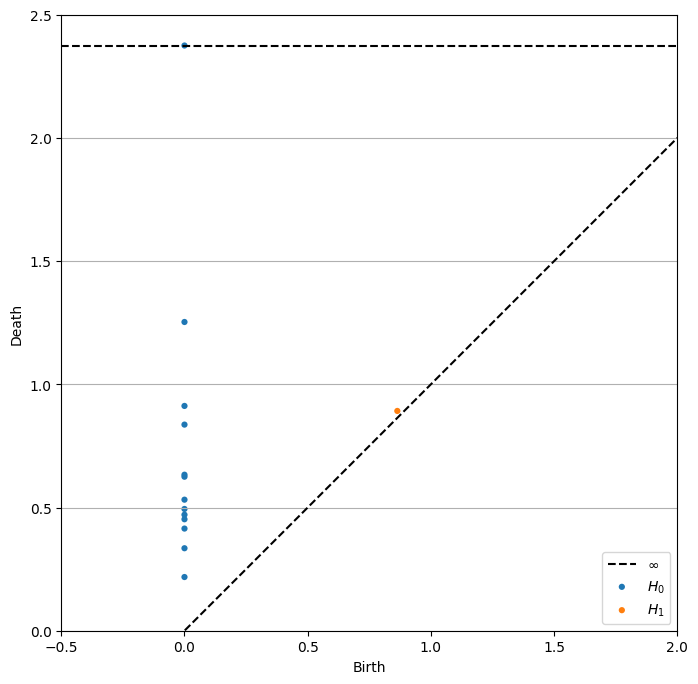

In [415]:
dgNOR = ripser(arrayPointsNOR)['dgms']
plt.grid(axis='y')
plot_diagrams(dgNOR, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

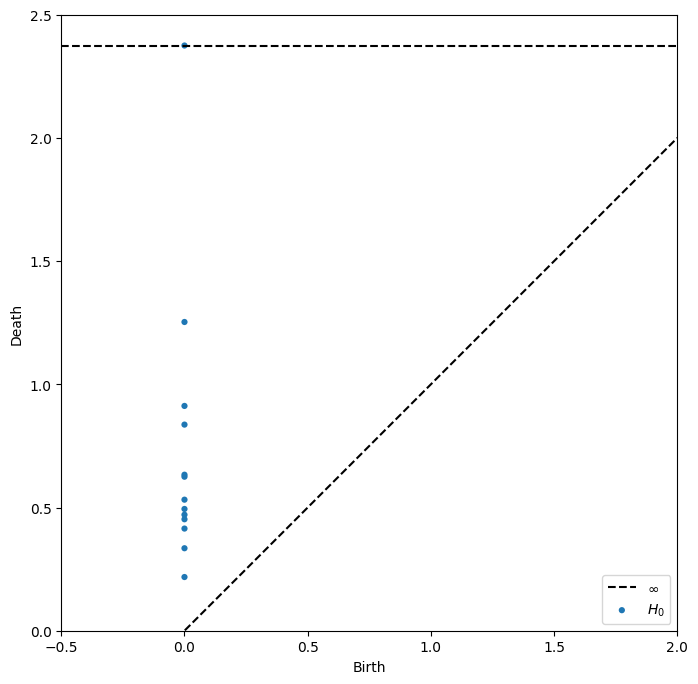

In [416]:
#diagram dla dziur zerowymiarowych (składowych spójnych)
dgNOR_H0 = ripser(arrayPointsNOR)['dgms'][0]
plot_diagrams(dgNOR_H0, show=True, xy_range=[-0.5,2,0,2.5])
plt.rcParams['figure.figsize'] = [8, 8]

#Policzenie odległość między parami diagramów

Odległości będą liczone tylko dla diagramów persystencji dotyczących dziur zerowymiarowych (składowych spójnych). 

## Wypisanie odległości między wszystkimi parami diagramów

###W formie słownej

In [417]:
print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgMCI_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgMCI_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgMCI_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgARS_H0 ')
print(persim.bottleneck(dgMCI_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgMCI_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgMCI_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgMCI_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgMCI_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgMCI_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgMCI_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgMCI_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgMCI_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgMCI_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgMCI_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgMCI_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgMCI_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgMCI_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgMCI_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgMCI_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgLIV_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgLIV_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgARS_H0 ')
print(persim.bottleneck(dgLIV_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgLIV_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgLIV_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgLIV_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgLIV_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgLIV_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgLIV_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgLIV_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgLIV_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgLIV_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgLIV_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgLIV_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgLIV_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgLIV_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgLIV_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLIV_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgLIV_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgCHE_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgCHE_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgARS_H0 ')
print(persim.bottleneck(dgCHE_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgCHE_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgCHE_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgCHE_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgCHE_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgCHE_H0, dgWOL_H0))
print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgCHE_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgCHE_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgCHE_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgCHE_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgCHE_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgCHE_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgCHE_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgCHE_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgCHE_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCHE_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgCHE_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgTOT_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgTOT_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgARS_H0 ')
print(persim.bottleneck(dgTOT_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgTOT_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgTOT_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgTOT_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgTOT_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgTOT_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgTOT_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgTOT_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgTOT_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgTOT_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgTOT_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgTOT_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgTOT_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgTOT_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgTOT_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgTOT_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgTOT_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgARS_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgARS_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgARS_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgARS_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgARS_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgARS_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgARS_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgARS_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgARS_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgARS_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgARS_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgARS_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgARS_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgARS_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgARS_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgARS_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgARS_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgARS_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgARS_H0, dgNOR_H0))

print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgMUN_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgMUN_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgMUN_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgARS_H0 ')
print(persim.bottleneck(dgMUN_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgMUN_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgMUN_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgMUN_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgMUN_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgMUN_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgMUN_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgMUN_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgMUN_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgMUN_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgMUN_H0, dgEVE_H0))
print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgMUN_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgMUN_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgMUN_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgMUN_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgMUN_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgWHU_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgWHU_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgWHU_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgARS_H0 ')
print(persim.bottleneck(dgWHU_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgWHU_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgWHU_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgWHU_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgWHU_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgWHU_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgWHU_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgWHU_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgWHU_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgWHU_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgWHU_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgWHU_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgWHU_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgWHU_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWHU_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgWHU_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgLEI_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgLEI_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgLEI_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgARS_H0 ')
print(persim.bottleneck(dgLEI_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgLEI_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgLEI_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgLEI_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgLEI_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgLEI_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgLEI_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgLEI_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgLEI_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgLEI_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgLEI_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgLEI_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgLEI_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgLEI_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEI_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgLEI_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgBHA_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgBHA_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgBHA_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgARS_H0 ')
print(persim.bottleneck(dgBHA_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgBHA_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgBHA_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgBHA_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgBHA_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgBHA_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgBHA_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgBHA_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgBHA_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgBHA_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgBHA_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgBHA_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgBHA_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgBHA_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBHA_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgBHA_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgWOL_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgWOL_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgWOL_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgARS_H0 ')
print(persim.bottleneck(dgWOL_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgWOL_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgWOL_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgWOL_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgWOL_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgWOL_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgWOL_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgWOL_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgWOL_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgWOL_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgWOL_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgWOL_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgWOL_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgWOL_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWOL_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgWOL_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgNEW_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgNEW_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgNEW_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgARS_H0 ')
print(persim.bottleneck(dgNEW_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgNEW_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgNEW_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgNEW_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgNEW_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgNEW_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgNEW_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgNEW_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgNEW_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgNEW_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgNEW_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgNEW_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgNEW_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgNEW_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNEW_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgNEW_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgCRY_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgCRY_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgCRY_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgARS_H0 ')
print(persim.bottleneck(dgCRY_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgCRY_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgCRY_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgCRY_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgCRY_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgCRY_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgCRY_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgCRY_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgCRY_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgCRY_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgCRY_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgCRY_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgCRY_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgCRY_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgCRY_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgCRY_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgBRE_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgBRE_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgBRE_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgARS_H0 ')
print(persim.bottleneck(dgBRE_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgBRE_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgBRE_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgBRE_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgBRE_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgBRE_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgBRE_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgBRE_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgBRE_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgBRE_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgBRE_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgBRE_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgBRE_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgBRE_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRE_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgBRE_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgAVL_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgAVL_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgAVL_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgARS_H0 ')
print(persim.bottleneck(dgAVL_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgAVL_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgAVL_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgAVL_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgAVL_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgAVL_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgAVL_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgAVL_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgAVL_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgAVL_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgAVL_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgAVL_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgAVL_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgAVL_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgAVL_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgAVL_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgSOU_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgSOU_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgSOU_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgARS_H0 ')
print(persim.bottleneck(dgSOU_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgSOU_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgSOU_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgSOU_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgSOU_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgSOU_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgSOU_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgSOU_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgSOU_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgSOU_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgSOU_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgSOU_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgSOU_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgSOU_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgSOU_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgSOU_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgEVE_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgEVE_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgEVE_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgARS_H0 ')
print(persim.bottleneck(dgEVE_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgEVE_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgEVE_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgEVE_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgEVE_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgEVE_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgEVE_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgEVE_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgEVE_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgEVE_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgEVE_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgEVE_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgEVE_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgEVE_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgEVE_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgEVE_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgLEE_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgLEE_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgLEE_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgARS_H0 ')
print(persim.bottleneck(dgLEE_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgLEE_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgLEE_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgLEE_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgLEE_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgLEE_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgLEE_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgLEE_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgLEE_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgLEE_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgLEE_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgLEE_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgLEE_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgLEE_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgLEE_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgLEE_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgBRN_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgBRN_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgBRN_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgARS_H0 ')
print(persim.bottleneck(dgBRN_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgBRN_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgBRN_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgBRN_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgBRN_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgBRN_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgBRN_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgBRN_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgBRN_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgBRN_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgBRN_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgBRN_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgBRN_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgBRN_H0, dgWAT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgBRN_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgBRN_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgWAT_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgWAT_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgWAT_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgARS_H0 ')
print(persim.bottleneck(dgWAT_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgWAT_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgWAT_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgWAT_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgWAT_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgWAT_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgWAT_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgWAT_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgWAT_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgWAT_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgWAT_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgWAT_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgWAT_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgWAT_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgWAT_H0 a dgNOR_H0 ')
print(persim.bottleneck(dgWAT_H0, dgNOR_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgLIV_H0 ')
print(persim.bottleneck(dgNOR_H0, dgLIV_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgCHE_H0 ')
print(persim.bottleneck(dgNOR_H0, dgCHE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgTOT_H0 ')
print(persim.bottleneck(dgNOR_H0, dgTOT_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgARS_H0 ')
print(persim.bottleneck(dgNOR_H0, dgARS_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgMUN_H0 ')
print(persim.bottleneck(dgNOR_H0, dgMUN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgWHU_H0 ')
print(persim.bottleneck(dgNOR_H0, dgWHU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgLEI_H0 ')
print(persim.bottleneck(dgNOR_H0, dgLEI_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgBHA_H0 ')
print(persim.bottleneck(dgNOR_H0, dgBHA_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgWOL_H0 ')
print(persim.bottleneck(dgNOR_H0, dgWOL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgNEW_H0 ')
print(persim.bottleneck(dgNOR_H0, dgNEW_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgCRY_H0 ')
print(persim.bottleneck(dgNOR_H0, dgCRY_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgBRE_H0 ')
print(persim.bottleneck(dgNOR_H0, dgBRE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgAVL_H0 ')
print(persim.bottleneck(dgNOR_H0, dgAVL_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgSOU_H0 ')
print(persim.bottleneck(dgNOR_H0, dgSOU_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgEVE_H0 ')
print(persim.bottleneck(dgNOR_H0, dgEVE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgLEE_H0 ')
print(persim.bottleneck(dgNOR_H0, dgLEE_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgBRN_H0 ')
print(persim.bottleneck(dgNOR_H0, dgBRN_H0))


print('#skrótowe obliczenie odleglosci pomiedzy dgNOR_H0 a dgWAT_H0 ')
print(persim.bottleneck(dgNOR_H0, dgWAT_H0))


#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgLIV_H0 
0.24536490440368652
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgCHE_H0 
0.17371797561645508
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgTOT_H0 
0.5145970582962036
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgARS_H0 
0.13486838340759277
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgMUN_H0 
0.5469740629196167
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgWHU_H0 
0.23354297876358032
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgLEI_H0 
0.14409011602401733
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgBHA_H0 
0.15543752908706665
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgWOL_H0 
0.2360098958015442
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgNEW_H0 
0.22391533851623535
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgCRY_H0 
0.15306270122528076
#skrótowe obliczenie odleglosci pomiedzy dgMCI_H0 a dgBRE_H0 
0.18171048164367676
#skrótowe obliczeni

###W formie tabeli

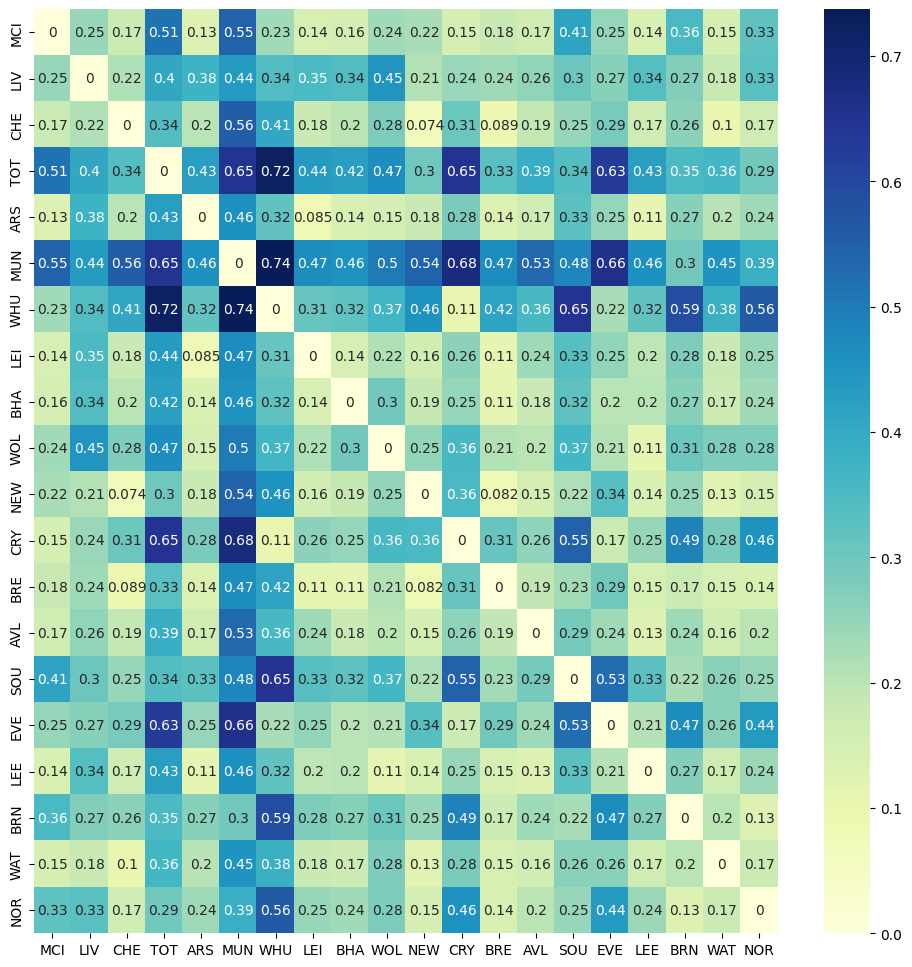

In [418]:
plt.figure(figsize = (12,12))


bottleneckDistances = [[0, persim.bottleneck(dgMCI_H0, dgLIV_H0), persim.bottleneck(dgMCI_H0, dgCHE_H0), persim.bottleneck(dgMCI_H0, dgTOT_H0), persim.bottleneck(dgMCI_H0, dgARS_H0), persim.bottleneck(dgMCI_H0, dgMUN_H0), persim.bottleneck(dgMCI_H0, dgWHU_H0), persim.bottleneck(dgMCI_H0, dgLEI_H0), persim.bottleneck(dgMCI_H0, dgBHA_H0), persim.bottleneck(dgMCI_H0, dgWOL_H0), persim.bottleneck(dgMCI_H0, dgNEW_H0), persim.bottleneck(dgMCI_H0, dgCRY_H0), persim.bottleneck(dgMCI_H0, dgBRE_H0), persim.bottleneck(dgMCI_H0, dgAVL_H0), persim.bottleneck(dgMCI_H0, dgSOU_H0), persim.bottleneck(dgMCI_H0, dgEVE_H0), persim.bottleneck(dgMCI_H0, dgLEE_H0), persim.bottleneck(dgMCI_H0, dgBRN_H0), persim.bottleneck(dgMCI_H0, dgWAT_H0), persim.bottleneck(dgMCI_H0, dgNOR_H0)],
        [persim.bottleneck(dgLIV_H0, dgMCI_H0), 0, persim.bottleneck(dgLIV_H0, dgCHE_H0), persim.bottleneck(dgLIV_H0, dgTOT_H0), persim.bottleneck(dgLIV_H0, dgARS_H0), persim.bottleneck(dgLIV_H0, dgMUN_H0), persim.bottleneck(dgLIV_H0, dgWHU_H0), persim.bottleneck(dgLIV_H0, dgLEI_H0), persim.bottleneck(dgLIV_H0, dgBHA_H0), persim.bottleneck(dgLIV_H0, dgWOL_H0), persim.bottleneck(dgLIV_H0, dgNEW_H0), persim.bottleneck(dgLIV_H0, dgCRY_H0), persim.bottleneck(dgLIV_H0, dgBRE_H0), persim.bottleneck(dgLIV_H0, dgAVL_H0), persim.bottleneck(dgLIV_H0, dgSOU_H0), persim.bottleneck(dgLIV_H0, dgEVE_H0), persim.bottleneck(dgLIV_H0, dgLEE_H0), persim.bottleneck(dgLIV_H0, dgBRN_H0), persim.bottleneck(dgLIV_H0, dgWAT_H0), persim.bottleneck(dgLIV_H0, dgNOR_H0)],
        [persim.bottleneck(dgCHE_H0, dgMCI_H0), persim.bottleneck(dgCHE_H0, dgLIV_H0), 0, persim.bottleneck(dgCHE_H0, dgTOT_H0), persim.bottleneck(dgCHE_H0, dgARS_H0), persim.bottleneck(dgCHE_H0, dgMUN_H0), persim.bottleneck(dgCHE_H0, dgWHU_H0), persim.bottleneck(dgCHE_H0, dgLEI_H0), persim.bottleneck(dgCHE_H0, dgBHA_H0), persim.bottleneck(dgCHE_H0, dgWOL_H0), persim.bottleneck(dgCHE_H0, dgNEW_H0), persim.bottleneck(dgCHE_H0, dgCRY_H0), persim.bottleneck(dgCHE_H0, dgBRE_H0), persim.bottleneck(dgCHE_H0, dgAVL_H0), persim.bottleneck(dgCHE_H0, dgSOU_H0), persim.bottleneck(dgCHE_H0, dgEVE_H0), persim.bottleneck(dgCHE_H0, dgLEE_H0), persim.bottleneck(dgCHE_H0, dgBRN_H0), persim.bottleneck(dgCHE_H0, dgWAT_H0), persim.bottleneck(dgCHE_H0, dgNOR_H0)],
        [persim.bottleneck(dgTOT_H0, dgMCI_H0), persim.bottleneck(dgTOT_H0, dgLIV_H0), persim.bottleneck(dgTOT_H0, dgCHE_H0), 0, persim.bottleneck(dgTOT_H0, dgARS_H0), persim.bottleneck(dgTOT_H0, dgMUN_H0), persim.bottleneck(dgTOT_H0, dgWHU_H0), persim.bottleneck(dgTOT_H0, dgLEI_H0), persim.bottleneck(dgTOT_H0, dgBHA_H0), persim.bottleneck(dgTOT_H0, dgWOL_H0), persim.bottleneck(dgTOT_H0, dgNEW_H0), persim.bottleneck(dgTOT_H0, dgCRY_H0), persim.bottleneck(dgTOT_H0, dgBRE_H0), persim.bottleneck(dgTOT_H0, dgAVL_H0), persim.bottleneck(dgTOT_H0, dgSOU_H0), persim.bottleneck(dgTOT_H0, dgEVE_H0), persim.bottleneck(dgTOT_H0, dgLEE_H0), persim.bottleneck(dgTOT_H0, dgBRN_H0), persim.bottleneck(dgTOT_H0, dgWAT_H0), persim.bottleneck(dgTOT_H0, dgNOR_H0)],
        [persim.bottleneck(dgARS_H0, dgMCI_H0), persim.bottleneck(dgARS_H0, dgLIV_H0), persim.bottleneck(dgARS_H0, dgCHE_H0), persim.bottleneck(dgARS_H0, dgTOT_H0), 0, persim.bottleneck(dgARS_H0, dgMUN_H0), persim.bottleneck(dgARS_H0, dgWHU_H0), persim.bottleneck(dgARS_H0, dgLEI_H0), persim.bottleneck(dgARS_H0, dgBHA_H0), persim.bottleneck(dgARS_H0, dgWOL_H0), persim.bottleneck(dgARS_H0, dgNEW_H0), persim.bottleneck(dgARS_H0, dgCRY_H0), persim.bottleneck(dgARS_H0, dgBRE_H0), persim.bottleneck(dgARS_H0, dgAVL_H0), persim.bottleneck(dgARS_H0, dgSOU_H0), persim.bottleneck(dgARS_H0, dgEVE_H0), persim.bottleneck(dgARS_H0, dgLEE_H0), persim.bottleneck(dgARS_H0, dgBRN_H0), persim.bottleneck(dgARS_H0, dgWAT_H0), persim.bottleneck(dgARS_H0, dgNOR_H0)],
        [persim.bottleneck(dgMUN_H0, dgMCI_H0), persim.bottleneck(dgMUN_H0, dgLIV_H0), persim.bottleneck(dgMUN_H0, dgCHE_H0), persim.bottleneck(dgMUN_H0, dgTOT_H0), persim.bottleneck(dgMUN_H0, dgARS_H0), 0, persim.bottleneck(dgMUN_H0, dgWHU_H0), persim.bottleneck(dgMUN_H0, dgLEI_H0), persim.bottleneck(dgMUN_H0, dgBHA_H0), persim.bottleneck(dgMUN_H0, dgWOL_H0), persim.bottleneck(dgMUN_H0, dgNEW_H0), persim.bottleneck(dgMUN_H0, dgCRY_H0), persim.bottleneck(dgMUN_H0, dgBRE_H0), persim.bottleneck(dgMUN_H0, dgAVL_H0), persim.bottleneck(dgMUN_H0, dgSOU_H0), persim.bottleneck(dgMUN_H0, dgEVE_H0), persim.bottleneck(dgMUN_H0, dgLEE_H0), persim.bottleneck(dgMUN_H0, dgBRN_H0), persim.bottleneck(dgMUN_H0, dgWAT_H0), persim.bottleneck(dgMUN_H0, dgNOR_H0)],
        [persim.bottleneck(dgWHU_H0, dgMCI_H0), persim.bottleneck(dgWHU_H0, dgLIV_H0), persim.bottleneck(dgWHU_H0, dgCHE_H0), persim.bottleneck(dgWHU_H0, dgTOT_H0), persim.bottleneck(dgWHU_H0, dgARS_H0), persim.bottleneck(dgWHU_H0, dgMUN_H0), 0, persim.bottleneck(dgWHU_H0, dgLEI_H0), persim.bottleneck(dgWHU_H0, dgBHA_H0), persim.bottleneck(dgWHU_H0, dgWOL_H0), persim.bottleneck(dgWHU_H0, dgNEW_H0), persim.bottleneck(dgWHU_H0, dgCRY_H0), persim.bottleneck(dgWHU_H0, dgBRE_H0), persim.bottleneck(dgWHU_H0, dgAVL_H0), persim.bottleneck(dgWHU_H0, dgSOU_H0), persim.bottleneck(dgWHU_H0, dgEVE_H0), persim.bottleneck(dgWHU_H0, dgLEE_H0), persim.bottleneck(dgWHU_H0, dgBRN_H0), persim.bottleneck(dgWHU_H0, dgWAT_H0), persim.bottleneck(dgWHU_H0, dgNOR_H0)],
        [persim.bottleneck(dgLEI_H0, dgMCI_H0), persim.bottleneck(dgLEI_H0, dgLIV_H0), persim.bottleneck(dgLEI_H0, dgCHE_H0), persim.bottleneck(dgLEI_H0, dgTOT_H0), persim.bottleneck(dgLEI_H0, dgARS_H0), persim.bottleneck(dgLEI_H0, dgMUN_H0), persim.bottleneck(dgLEI_H0, dgWHU_H0), 0, persim.bottleneck(dgLEI_H0, dgBHA_H0), persim.bottleneck(dgLEI_H0, dgWOL_H0), persim.bottleneck(dgLEI_H0, dgNEW_H0), persim.bottleneck(dgLEI_H0, dgCRY_H0), persim.bottleneck(dgLEI_H0, dgBRE_H0), persim.bottleneck(dgLEI_H0, dgAVL_H0), persim.bottleneck(dgLEI_H0, dgSOU_H0), persim.bottleneck(dgLEI_H0, dgEVE_H0), persim.bottleneck(dgLEI_H0, dgLEE_H0), persim.bottleneck(dgLEI_H0, dgBRN_H0), persim.bottleneck(dgLEI_H0, dgWAT_H0), persim.bottleneck(dgLEI_H0, dgNOR_H0)],
        [persim.bottleneck(dgBHA_H0, dgMCI_H0), persim.bottleneck(dgBHA_H0, dgLIV_H0), persim.bottleneck(dgBHA_H0, dgCHE_H0), persim.bottleneck(dgBHA_H0, dgTOT_H0), persim.bottleneck(dgBHA_H0, dgARS_H0), persim.bottleneck(dgBHA_H0, dgMUN_H0), persim.bottleneck(dgBHA_H0, dgWHU_H0), persim.bottleneck(dgBHA_H0, dgLEI_H0), 0, persim.bottleneck(dgBHA_H0, dgWOL_H0), persim.bottleneck(dgBHA_H0, dgNEW_H0), persim.bottleneck(dgBHA_H0, dgCRY_H0), persim.bottleneck(dgBHA_H0, dgBRE_H0), persim.bottleneck(dgBHA_H0, dgAVL_H0), persim.bottleneck(dgBHA_H0, dgSOU_H0), persim.bottleneck(dgBHA_H0, dgEVE_H0), persim.bottleneck(dgBHA_H0, dgLEE_H0), persim.bottleneck(dgBHA_H0, dgBRN_H0), persim.bottleneck(dgBHA_H0, dgWAT_H0), persim.bottleneck(dgBHA_H0, dgNOR_H0)],
        [persim.bottleneck(dgWOL_H0, dgMCI_H0), persim.bottleneck(dgWOL_H0, dgLIV_H0), persim.bottleneck(dgWOL_H0, dgCHE_H0), persim.bottleneck(dgWOL_H0, dgTOT_H0), persim.bottleneck(dgWOL_H0, dgARS_H0), persim.bottleneck(dgWOL_H0, dgMUN_H0), persim.bottleneck(dgWOL_H0, dgWHU_H0), persim.bottleneck(dgWOL_H0, dgLEI_H0), persim.bottleneck(dgWOL_H0, dgBHA_H0), 0, persim.bottleneck(dgWOL_H0, dgNEW_H0), persim.bottleneck(dgWOL_H0, dgCRY_H0), persim.bottleneck(dgWOL_H0, dgBRE_H0), persim.bottleneck(dgWOL_H0, dgAVL_H0), persim.bottleneck(dgWOL_H0, dgSOU_H0), persim.bottleneck(dgWOL_H0, dgEVE_H0), persim.bottleneck(dgWOL_H0, dgLEE_H0), persim.bottleneck(dgWOL_H0, dgBRN_H0), persim.bottleneck(dgWOL_H0, dgWAT_H0), persim.bottleneck(dgWOL_H0, dgNOR_H0)],
        [persim.bottleneck(dgNEW_H0, dgMCI_H0), persim.bottleneck(dgNEW_H0, dgLIV_H0), persim.bottleneck(dgNEW_H0, dgCHE_H0), persim.bottleneck(dgNEW_H0, dgTOT_H0), persim.bottleneck(dgNEW_H0, dgARS_H0), persim.bottleneck(dgNEW_H0, dgMUN_H0), persim.bottleneck(dgNEW_H0, dgWHU_H0), persim.bottleneck(dgNEW_H0, dgLEI_H0), persim.bottleneck(dgNEW_H0, dgBHA_H0), persim.bottleneck(dgNEW_H0, dgWOL_H0), 0, persim.bottleneck(dgNEW_H0, dgCRY_H0), persim.bottleneck(dgNEW_H0, dgBRE_H0), persim.bottleneck(dgNEW_H0, dgAVL_H0), persim.bottleneck(dgNEW_H0, dgSOU_H0), persim.bottleneck(dgNEW_H0, dgEVE_H0), persim.bottleneck(dgNEW_H0, dgLEE_H0), persim.bottleneck(dgNEW_H0, dgBRN_H0), persim.bottleneck(dgNEW_H0, dgWAT_H0), persim.bottleneck(dgNEW_H0, dgNOR_H0)],
        [persim.bottleneck(dgCRY_H0, dgMCI_H0), persim.bottleneck(dgCRY_H0, dgLIV_H0), persim.bottleneck(dgCRY_H0, dgCHE_H0), persim.bottleneck(dgCRY_H0, dgTOT_H0), persim.bottleneck(dgCRY_H0, dgARS_H0), persim.bottleneck(dgCRY_H0, dgMUN_H0), persim.bottleneck(dgCRY_H0, dgWHU_H0), persim.bottleneck(dgCRY_H0, dgLEI_H0), persim.bottleneck(dgCRY_H0, dgBHA_H0), persim.bottleneck(dgCRY_H0, dgWOL_H0), persim.bottleneck(dgCRY_H0, dgNEW_H0), 0, persim.bottleneck(dgCRY_H0, dgBRE_H0), persim.bottleneck(dgCRY_H0, dgAVL_H0), persim.bottleneck(dgCRY_H0, dgSOU_H0), persim.bottleneck(dgCRY_H0, dgEVE_H0), persim.bottleneck(dgCRY_H0, dgLEE_H0), persim.bottleneck(dgCRY_H0, dgBRN_H0), persim.bottleneck(dgCRY_H0, dgWAT_H0), persim.bottleneck(dgCRY_H0, dgNOR_H0)],
        [persim.bottleneck(dgBRE_H0, dgMCI_H0), persim.bottleneck(dgBRE_H0, dgLIV_H0), persim.bottleneck(dgBRE_H0, dgCHE_H0), persim.bottleneck(dgBRE_H0, dgTOT_H0), persim.bottleneck(dgBRE_H0, dgARS_H0), persim.bottleneck(dgBRE_H0, dgMUN_H0), persim.bottleneck(dgBRE_H0, dgWHU_H0), persim.bottleneck(dgBRE_H0, dgLEI_H0), persim.bottleneck(dgBRE_H0, dgBHA_H0), persim.bottleneck(dgBRE_H0, dgWOL_H0), persim.bottleneck(dgBRE_H0, dgNEW_H0), persim.bottleneck(dgBRE_H0, dgCRY_H0), 0, persim.bottleneck(dgBRE_H0, dgAVL_H0), persim.bottleneck(dgBRE_H0, dgSOU_H0), persim.bottleneck(dgBRE_H0, dgEVE_H0), persim.bottleneck(dgBRE_H0, dgLEE_H0), persim.bottleneck(dgBRE_H0, dgBRN_H0), persim.bottleneck(dgBRE_H0, dgWAT_H0), persim.bottleneck(dgBRE_H0, dgNOR_H0)],
        [persim.bottleneck(dgAVL_H0, dgMCI_H0), persim.bottleneck(dgAVL_H0, dgLIV_H0), persim.bottleneck(dgAVL_H0, dgCHE_H0), persim.bottleneck(dgAVL_H0, dgTOT_H0), persim.bottleneck(dgAVL_H0, dgARS_H0), persim.bottleneck(dgAVL_H0, dgMUN_H0), persim.bottleneck(dgAVL_H0, dgWHU_H0), persim.bottleneck(dgAVL_H0, dgLEI_H0), persim.bottleneck(dgAVL_H0, dgBHA_H0), persim.bottleneck(dgAVL_H0, dgWOL_H0), persim.bottleneck(dgAVL_H0, dgNEW_H0), persim.bottleneck(dgAVL_H0, dgCRY_H0), persim.bottleneck(dgAVL_H0, dgBRE_H0), 0, persim.bottleneck(dgAVL_H0, dgSOU_H0), persim.bottleneck(dgAVL_H0, dgEVE_H0), persim.bottleneck(dgAVL_H0, dgLEE_H0), persim.bottleneck(dgAVL_H0, dgBRN_H0), persim.bottleneck(dgAVL_H0, dgWAT_H0), persim.bottleneck(dgAVL_H0, dgNOR_H0)],
        [persim.bottleneck(dgSOU_H0, dgMCI_H0), persim.bottleneck(dgSOU_H0, dgLIV_H0), persim.bottleneck(dgSOU_H0, dgCHE_H0), persim.bottleneck(dgSOU_H0, dgTOT_H0), persim.bottleneck(dgSOU_H0, dgARS_H0), persim.bottleneck(dgSOU_H0, dgMUN_H0), persim.bottleneck(dgSOU_H0, dgWHU_H0), persim.bottleneck(dgSOU_H0, dgLEI_H0), persim.bottleneck(dgSOU_H0, dgBHA_H0), persim.bottleneck(dgSOU_H0, dgWOL_H0), persim.bottleneck(dgSOU_H0, dgNEW_H0), persim.bottleneck(dgSOU_H0, dgCRY_H0), persim.bottleneck(dgSOU_H0, dgBRE_H0), persim.bottleneck(dgSOU_H0, dgAVL_H0), 0, persim.bottleneck(dgSOU_H0, dgEVE_H0), persim.bottleneck(dgSOU_H0, dgLEE_H0), persim.bottleneck(dgSOU_H0, dgBRN_H0), persim.bottleneck(dgSOU_H0, dgWAT_H0), persim.bottleneck(dgSOU_H0, dgNOR_H0)],
        [persim.bottleneck(dgEVE_H0, dgMCI_H0), persim.bottleneck(dgEVE_H0, dgLIV_H0), persim.bottleneck(dgEVE_H0, dgCHE_H0), persim.bottleneck(dgEVE_H0, dgTOT_H0), persim.bottleneck(dgEVE_H0, dgARS_H0), persim.bottleneck(dgEVE_H0, dgMUN_H0), persim.bottleneck(dgEVE_H0, dgWHU_H0), persim.bottleneck(dgEVE_H0, dgLEI_H0), persim.bottleneck(dgEVE_H0, dgBHA_H0), persim.bottleneck(dgEVE_H0, dgWOL_H0), persim.bottleneck(dgEVE_H0, dgNEW_H0), persim.bottleneck(dgEVE_H0, dgCRY_H0), persim.bottleneck(dgEVE_H0, dgBRE_H0), persim.bottleneck(dgEVE_H0, dgAVL_H0), persim.bottleneck(dgEVE_H0, dgSOU_H0), 0, persim.bottleneck(dgEVE_H0, dgLEE_H0), persim.bottleneck(dgEVE_H0, dgBRN_H0), persim.bottleneck(dgEVE_H0, dgWAT_H0), persim.bottleneck(dgEVE_H0, dgNOR_H0)],
        [persim.bottleneck(dgLEE_H0, dgMCI_H0), persim.bottleneck(dgLEE_H0, dgLIV_H0), persim.bottleneck(dgLEE_H0, dgCHE_H0), persim.bottleneck(dgLEE_H0, dgTOT_H0), persim.bottleneck(dgLEE_H0, dgARS_H0), persim.bottleneck(dgLEE_H0, dgMUN_H0), persim.bottleneck(dgLEE_H0, dgWHU_H0), persim.bottleneck(dgLEE_H0, dgLEI_H0), persim.bottleneck(dgLEE_H0, dgBHA_H0), persim.bottleneck(dgLEE_H0, dgWOL_H0), persim.bottleneck(dgLEE_H0, dgNEW_H0), persim.bottleneck(dgLEE_H0, dgCRY_H0), persim.bottleneck(dgLEE_H0, dgBRE_H0), persim.bottleneck(dgLEE_H0, dgAVL_H0), persim.bottleneck(dgLEE_H0, dgSOU_H0), persim.bottleneck(dgLEE_H0, dgEVE_H0), 0, persim.bottleneck(dgLEE_H0, dgBRN_H0), persim.bottleneck(dgLEE_H0, dgWAT_H0), persim.bottleneck(dgLEE_H0, dgNOR_H0)],
        [persim.bottleneck(dgBRN_H0, dgMCI_H0), persim.bottleneck(dgBRN_H0, dgLIV_H0), persim.bottleneck(dgBRN_H0, dgCHE_H0), persim.bottleneck(dgBRN_H0, dgTOT_H0), persim.bottleneck(dgBRN_H0, dgARS_H0), persim.bottleneck(dgBRN_H0, dgMUN_H0), persim.bottleneck(dgBRN_H0, dgWHU_H0), persim.bottleneck(dgBRN_H0, dgLEI_H0), persim.bottleneck(dgBRN_H0, dgBHA_H0), persim.bottleneck(dgBRN_H0, dgWOL_H0), persim.bottleneck(dgBRN_H0, dgNEW_H0), persim.bottleneck(dgBRN_H0, dgCRY_H0), persim.bottleneck(dgBRN_H0, dgBRE_H0), persim.bottleneck(dgBRN_H0, dgAVL_H0), persim.bottleneck(dgBRN_H0, dgSOU_H0), persim.bottleneck(dgBRN_H0, dgEVE_H0), persim.bottleneck(dgBRN_H0, dgLEE_H0), 0, persim.bottleneck(dgBRN_H0, dgWAT_H0), persim.bottleneck(dgBRN_H0, dgNOR_H0)],
        [persim.bottleneck(dgWAT_H0, dgMCI_H0), persim.bottleneck(dgWAT_H0, dgLIV_H0), persim.bottleneck(dgWAT_H0, dgCHE_H0), persim.bottleneck(dgWAT_H0, dgTOT_H0), persim.bottleneck(dgWAT_H0, dgARS_H0), persim.bottleneck(dgWAT_H0, dgMUN_H0), persim.bottleneck(dgWAT_H0, dgWHU_H0), persim.bottleneck(dgWAT_H0, dgLEI_H0), persim.bottleneck(dgWAT_H0, dgBHA_H0), persim.bottleneck(dgWAT_H0, dgWOL_H0), persim.bottleneck(dgWAT_H0, dgNEW_H0), persim.bottleneck(dgWAT_H0, dgCRY_H0), persim.bottleneck(dgWAT_H0, dgBRE_H0), persim.bottleneck(dgWAT_H0, dgAVL_H0), persim.bottleneck(dgWAT_H0, dgSOU_H0), persim.bottleneck(dgWAT_H0, dgEVE_H0), persim.bottleneck(dgWAT_H0, dgLEE_H0), persim.bottleneck(dgWAT_H0, dgBRN_H0), 0, persim.bottleneck(dgWAT_H0, dgNOR_H0)],
        [persim.bottleneck(dgNOR_H0, dgMCI_H0), persim.bottleneck(dgNOR_H0, dgLIV_H0), persim.bottleneck(dgNOR_H0, dgCHE_H0), persim.bottleneck(dgNOR_H0, dgTOT_H0), persim.bottleneck(dgNOR_H0, dgARS_H0), persim.bottleneck(dgNOR_H0, dgMUN_H0), persim.bottleneck(dgNOR_H0, dgWHU_H0), persim.bottleneck(dgNOR_H0, dgLEI_H0), persim.bottleneck(dgNOR_H0, dgBHA_H0), persim.bottleneck(dgNOR_H0, dgWOL_H0), persim.bottleneck(dgNOR_H0, dgNEW_H0), persim.bottleneck(dgNOR_H0, dgCRY_H0), persim.bottleneck(dgNOR_H0, dgBRE_H0), persim.bottleneck(dgNOR_H0, dgAVL_H0), persim.bottleneck(dgNOR_H0, dgSOU_H0), persim.bottleneck(dgNOR_H0, dgEVE_H0), persim.bottleneck(dgNOR_H0, dgLEE_H0), persim.bottleneck(dgNOR_H0, dgBRN_H0), persim.bottleneck(dgNOR_H0, dgWAT_H0), 0],
        ]

teamLabels = ["MCI", "LIV", "CHE", "TOT", "ARS", "MUN", "WHU", "LEI", "BHA", "WOL", "NEW","CRY", "BRE", "AVL", "SOU", "EVE", "LEE", "BRN", "WAT", "NOR"]

ax = sns.heatmap(bottleneckDistances, xticklabels=teamLabels, yticklabels=teamLabels, annot=True, cmap="YlGnBu")
plt.show()

#Stworzenie dendrogramów 

In [419]:
distanceMartix = np.array(bottleneckDistances)
distanceMartix

array([[0.        , 0.2453649 , 0.17371798, 0.51459706, 0.13486838,
        0.54697406, 0.23354298, 0.14409012, 0.15543753, 0.2360099 ,
        0.22391534, 0.1530627 , 0.18171048, 0.16549167, 0.41385257,
        0.24992365, 0.14291596, 0.35577607, 0.15133297, 0.32541847],
       [0.2453649 , 0.        , 0.21510974, 0.40352762, 0.37669253,
        0.43590462, 0.34461242, 0.35269243, 0.34278101, 0.45103717,
        0.21063644, 0.24264413, 0.23875237, 0.2551688 , 0.30278313,
        0.26628309, 0.33880633, 0.27209562, 0.18177733, 0.33250135],
       [0.17371798, 0.21510974, 0.        , 0.34087908, 0.20389754,
        0.5555051 , 0.40726095, 0.17989743, 0.20057315, 0.27824217,
        0.07397804, 0.30529267, 0.08873451, 0.18945211, 0.24620573,
        0.28623432, 0.16772628, 0.25984269, 0.10331744, 0.16832948],
       [0.51459706, 0.40352762, 0.34087908, 0.        , 0.42627895,
        0.64881045, 0.72108364, 0.43540788, 0.42475975, 0.46632653,
        0.30217251, 0.64617175, 0.33288658, 0

In [420]:
teamRankingLabels = ["MCI-1", "LIV-2", "CHE-3", "TOT-4", "ARS-5", "MUN-6", "WHU-7", "LEI-8", "BHA-9", "WOL-10", "NEW-11", "CRY-12", "BRE-13", "AVL-14", "SOU-15", "EVE-16", "LEE-17", "BRN-18", "WAT-19", "NOR-20"]


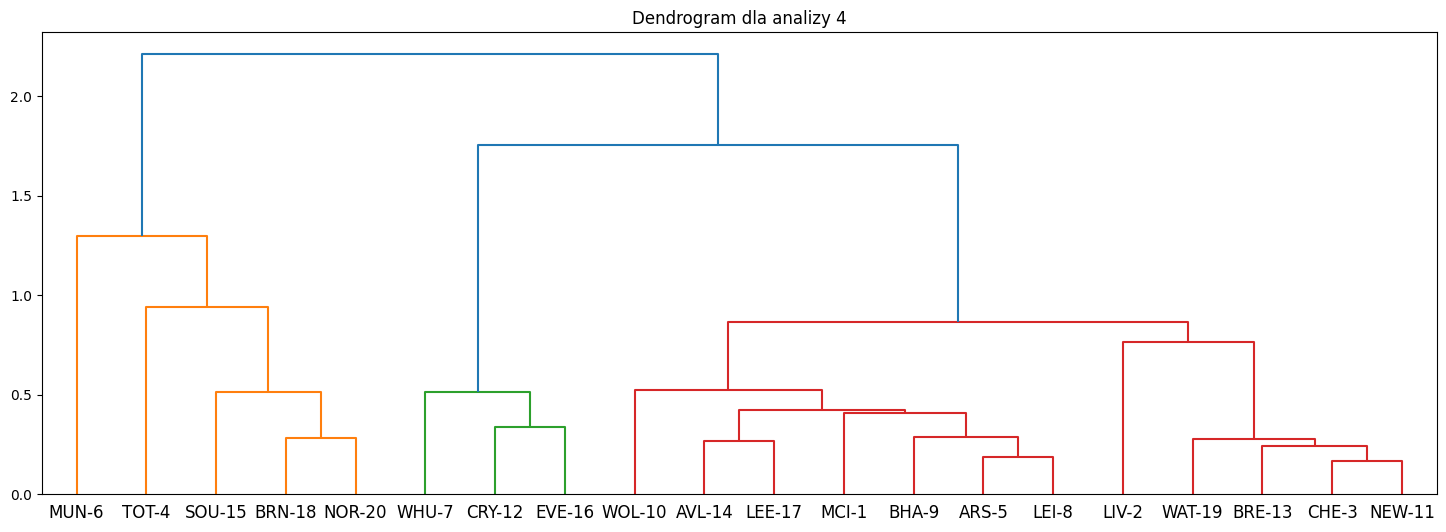

In [421]:
plt.figure(figsize=(18, 6))
plt.title("Dendrogram dla analizy 4")
clusters = shc.linkage(distanceMartix, method='ward', metric="euclidean")
shc.dendrogram(Z=clusters, labels=teamRankingLabels)
plt.show()